# Importing Lib

In [1]:
import sagemaker
import boto3
import pandas as pd
import numpy as np
import torch
import scipy
import seaborn as sns
import os
import matplotlib.pyplot as plt

# Read Data

In [2]:
main_data_path = "Dataset/"

In [36]:
raw_data = pd.read_csv(os.path.join(main_data_path,"patience_data.csv"))

# Explore Data

In [4]:
raw_data.head()

id   Age sex  MH EAM    Hb  RBCs   WBCs   Plat   ESR    CRP   DAS   YKL40  \
0  1.0  43.0   F  no  no   9.1  4.00   9.00  235.0  55.0     12  5.30    17.5   
1  2.0  39.0   F  no  no  10.9  4.00   7.40  376.0  45.0     56  5.84    91.5   
2  3.0  45.0   F  no  no  12.4  5.00   3.80  315.0  25.0  21.08  4.28   836.4   
3  4.0  52.0   M  no  no  11.8  5.19  14.18  334.0  80.0   24.8  5.28  1795.0   
4  5.0  50.0   M  no  no  13.1  4.50   7.30  252.0  31.0   23.3  6.20  2083.0   

     RF Anticcp   Ast   Alt  
0    36     131  17.0  17.0  
1   125     163  10.0  10.0  
2    20      50  17.0  12.0  
3   148     176  28.0  25.0  
4  75.5     973  14.0  13.0

In [5]:
raw_data.info() #TODO remove null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       60 non-null     float64
 1   Age      60 non-null     float64
 2   sex      61 non-null     object 
 3   MH       60 non-null     object 
 4   EAM      60 non-null     object 
 5   Hb       60 non-null     float64
 6   RBCs     60 non-null     float64
 7   WBCs     60 non-null     float64
 8   Plat     60 non-null     float64
 9   ESR      60 non-null     float64
 10  CRP      60 non-null     object 
 11  DAS      60 non-null     float64
 12  YKL40    60 non-null     float64
 13  RF       60 non-null     object 
 14  Anticcp  60 non-null     object 
 15  Ast      60 non-null     float64
 16  Alt      60 non-null     float64
dtypes: float64(11), object(6)
memory usage: 8.2+ KB


In [6]:
raw_data.describe()

id        Age         Hb       RBCs       WBCs        Plat  \
count  60.000000  60.000000  60.000000  60.000000  60.000000   60.000000   
mean   30.500000  45.916667  11.293333   4.286167   6.426333  293.033333   
std    17.464249  10.469150   1.455541   0.513136   2.203839   94.010812   
min     1.000000  27.000000   7.000000   3.300000   3.590000  124.000000   
25%    15.750000  39.000000  10.500000   4.000000   4.900000  238.750000   
50%    30.500000  45.000000  11.300000   4.185000   6.250000  280.000000   
75%    45.250000  52.000000  12.225000   4.500000   7.200000  330.500000   
max    60.000000  70.000000  15.000000   5.700000  14.800000  697.000000   

              ESR        DAS        YKL40        Ast        Alt  
count   60.000000  60.000000    60.000000  60.000000  60.000000  
mean    31.266667   4.160667   303.751667  23.966667  22.866667  
std     20.957476   1.324715   450.349329   6.645928   7.012016  
min     10.000000   1.900000     8.000000  10.000000  10.000000  
25%     15.000000   3.000000    28.625000  19.000000  18.000000  
50%     25.500000   4.020000   101.500000  22.000000  22.000000  
75%     38.000000   5.330000   428.700000  30.000000  28.000000  
max    100.000000   6.200000  2083.000000  38.000000  38.000000

In [37]:
for column in raw_data.columns:
    print(f"column: {column} {len(raw_data[column].unique())}")

column: id 61
column: Age 30
column: sex 2
column: MH 2
column: EAM 2
column: Hb 36
column: RBCs 26
column: WBCs 44
column: Plat 49
column: ESR 29
column: CRP 43
column: DAS 52
column: YKL40 56
column: RF 28
column: Anticcp 56
column: Ast 23
column: Alt 21


In [38]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       60 non-null     float64
 1   Age      60 non-null     float64
 2   sex      61 non-null     object 
 3   MH       60 non-null     object 
 4   EAM      60 non-null     object 
 5   Hb       60 non-null     float64
 6   RBCs     60 non-null     float64
 7   WBCs     60 non-null     float64
 8   Plat     60 non-null     float64
 9   ESR      60 non-null     float64
 10  CRP      60 non-null     object 
 11  DAS      60 non-null     float64
 12  YKL40    60 non-null     float64
 13  RF       60 non-null     object 
 14  Anticcp  60 non-null     object 
 15  Ast      60 non-null     float64
 16  Alt      60 non-null     float64
dtypes: float64(11), object(6)
memory usage: 8.2+ KB


In [39]:
raw_data.dropna(inplace=True)

In [40]:
raw_data.drop("id",axis=1,inplace=True)

# Visualize Data

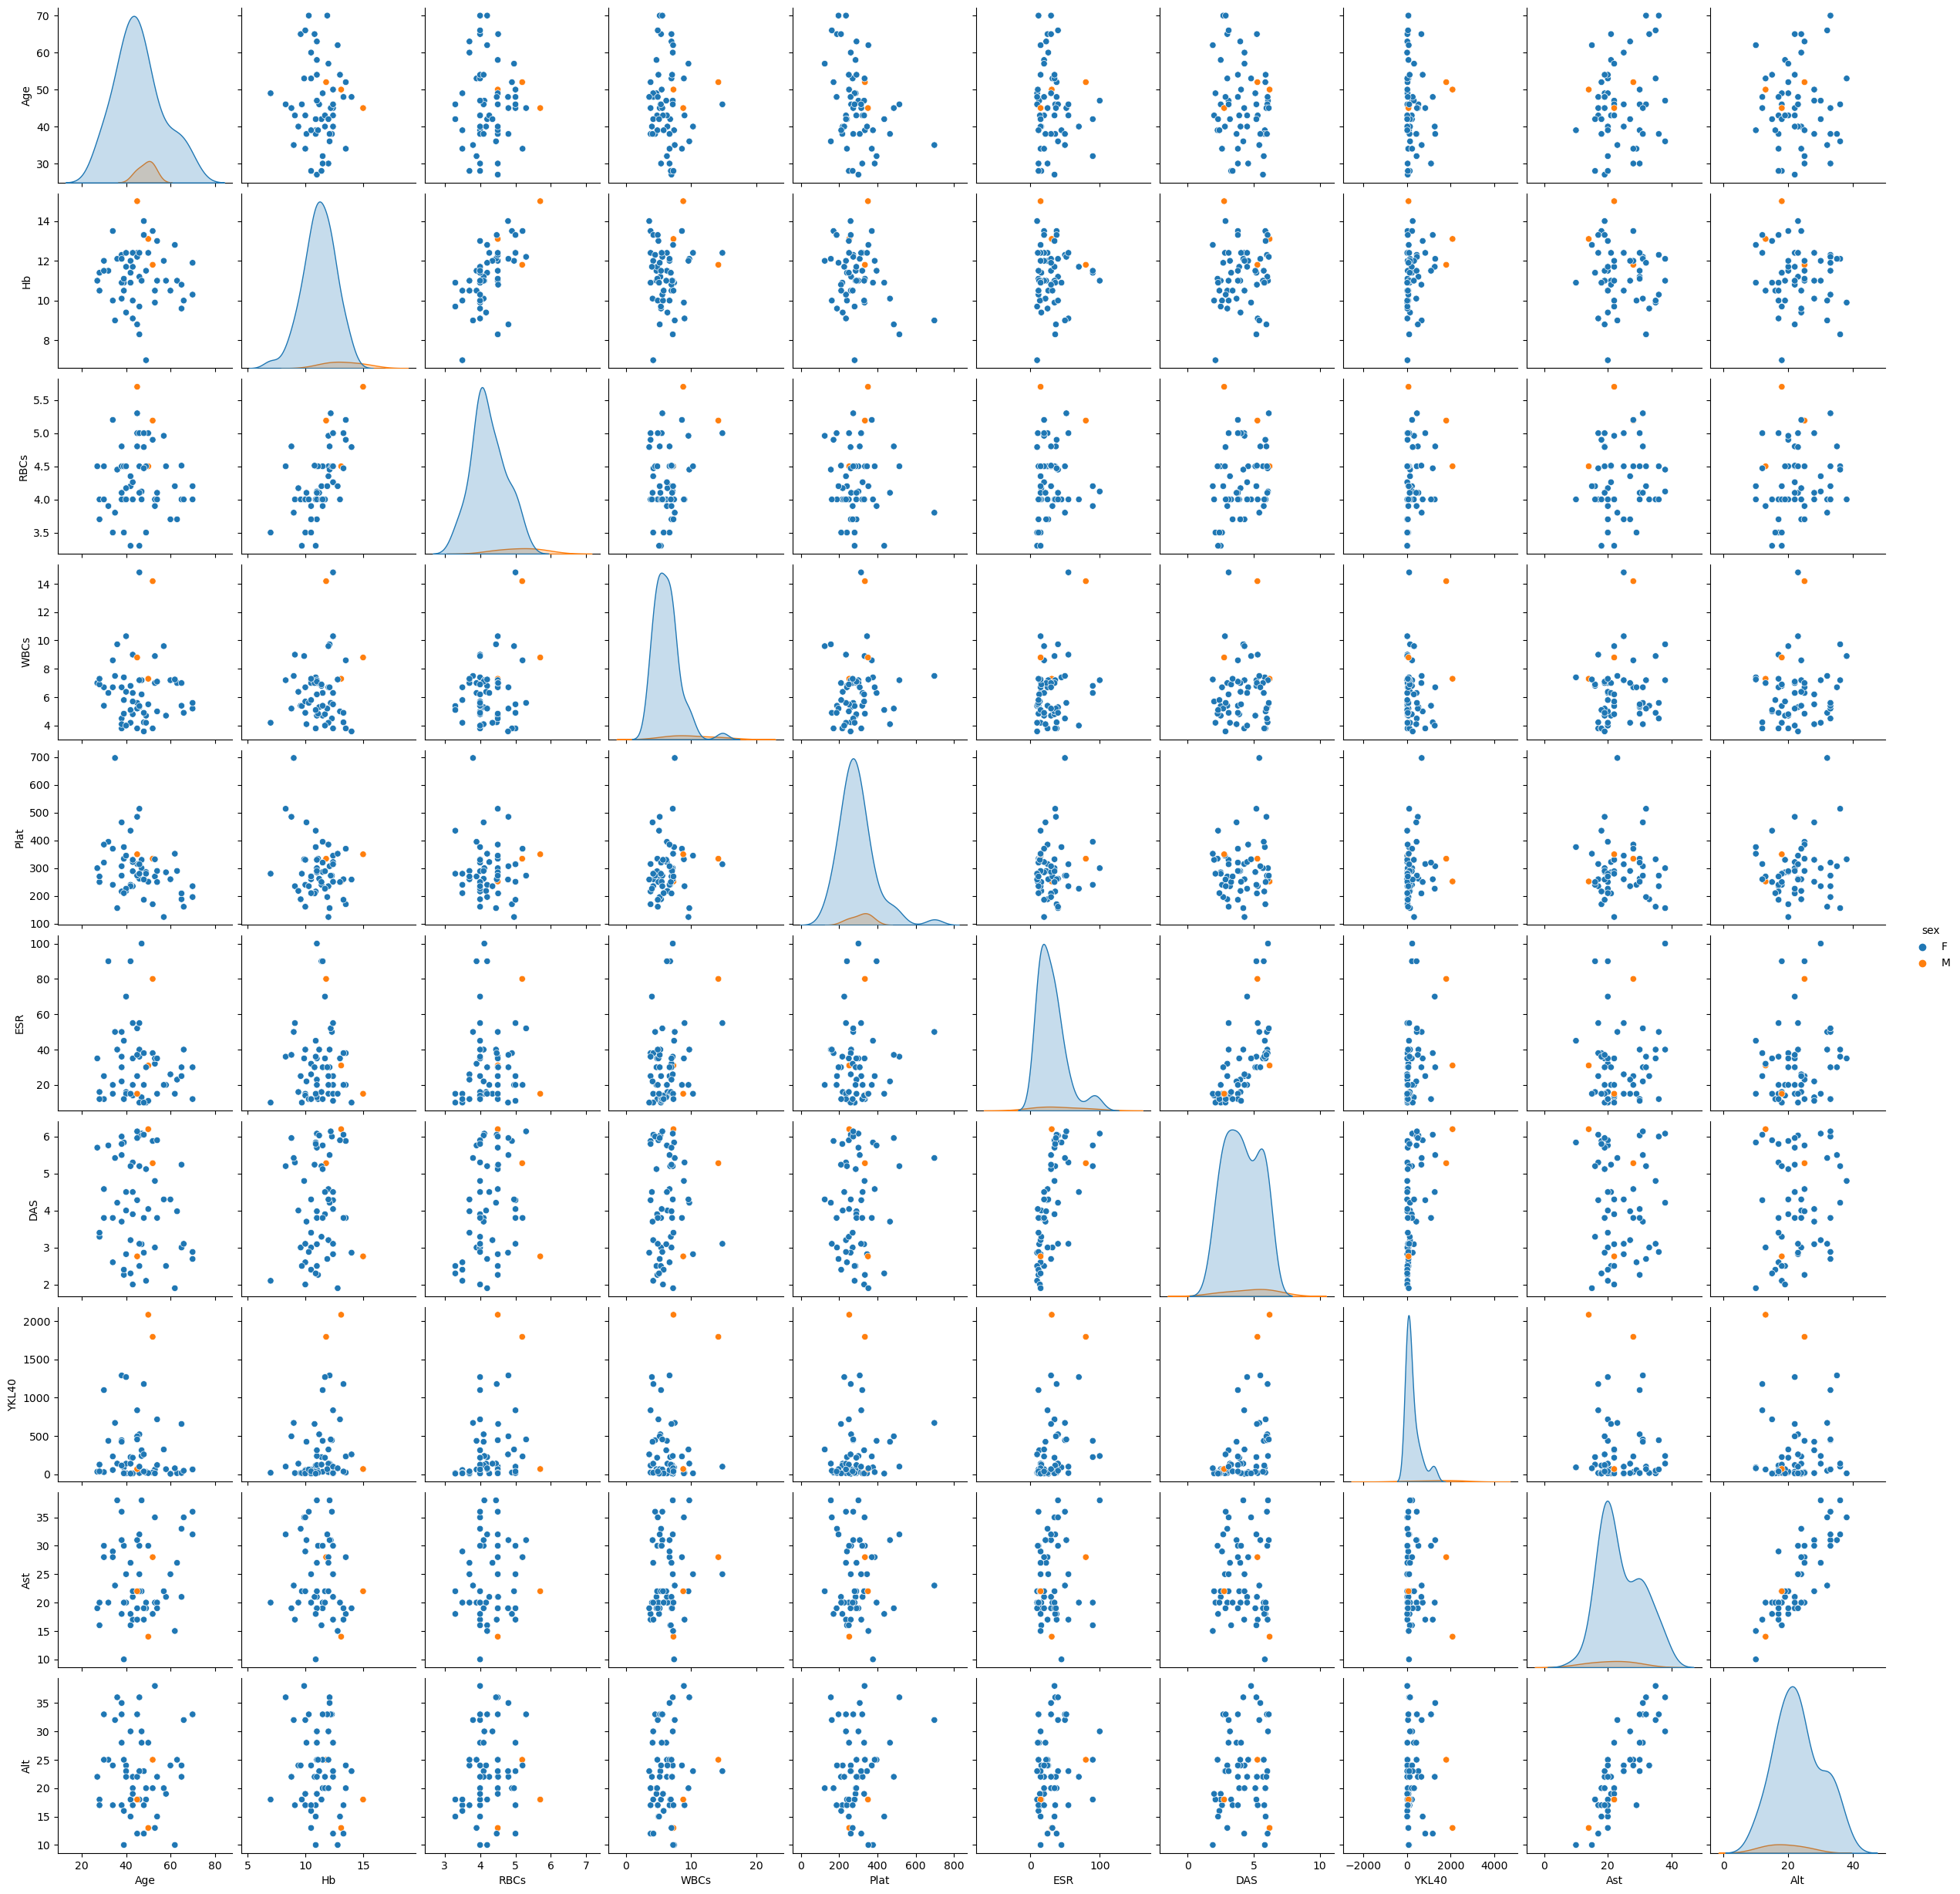

In [11]:
sns.pairplot(raw_data,hue="sex")

4


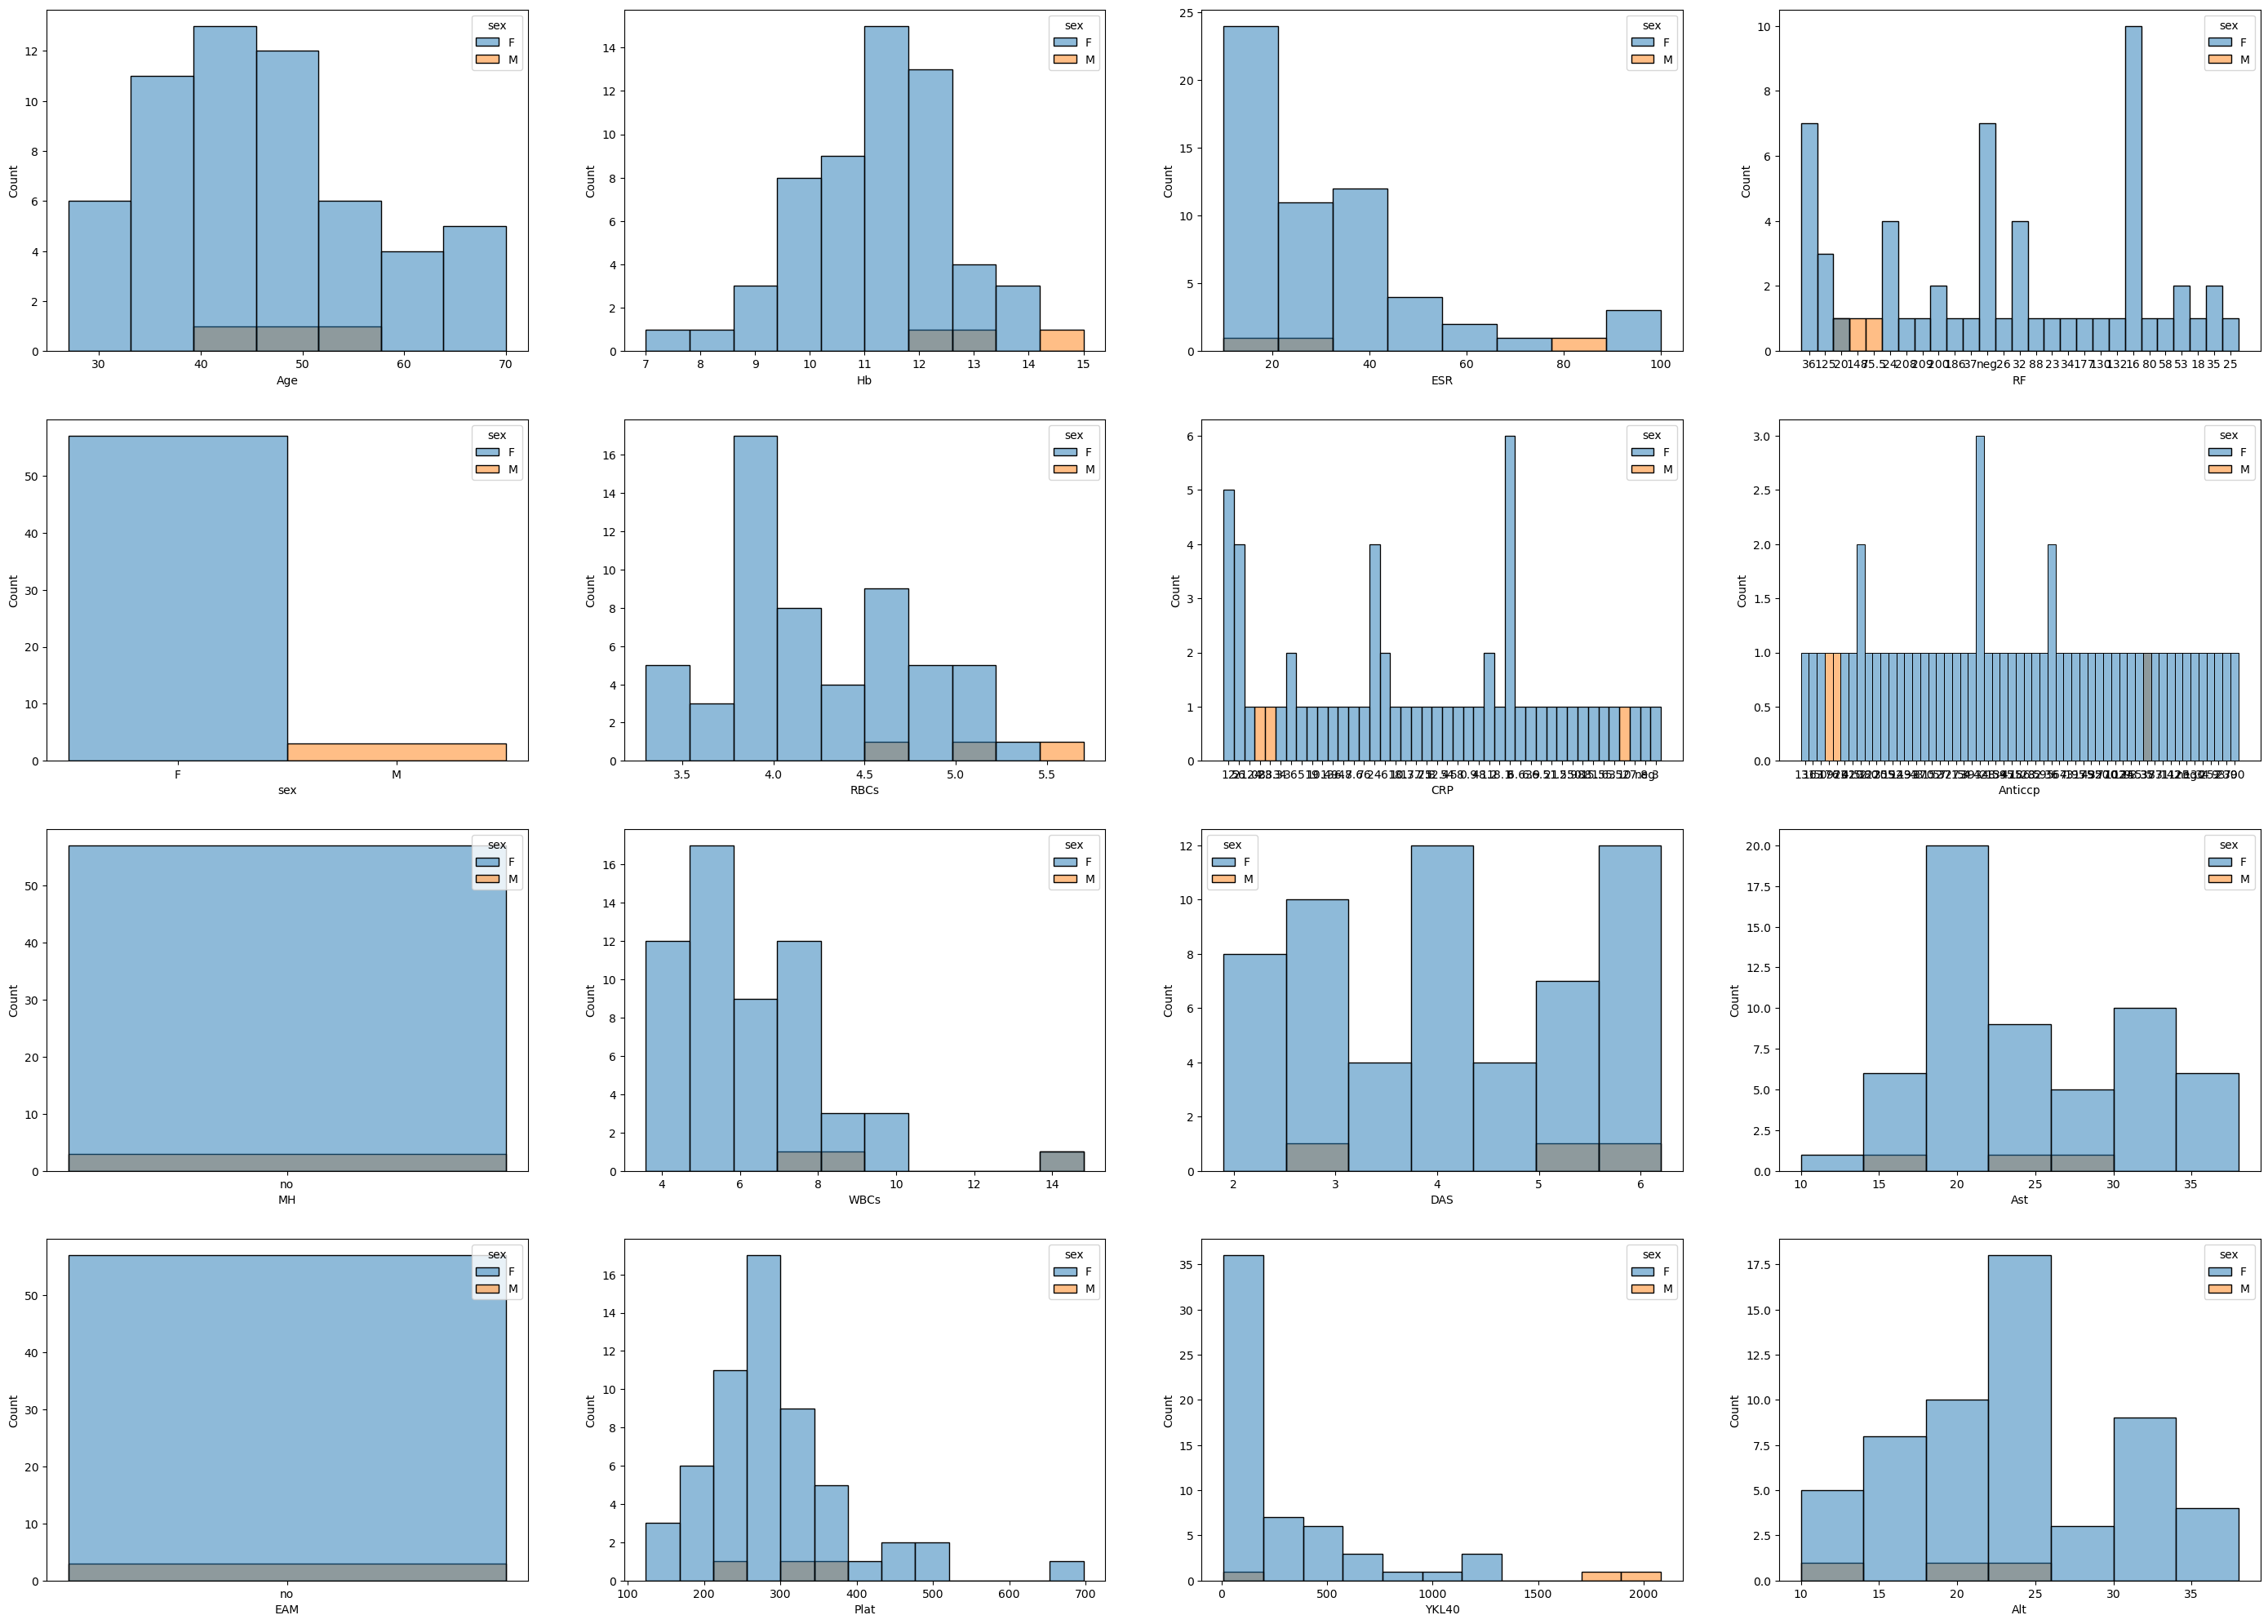

In [12]:
number_of_sub_plots = int((len(raw_data.columns)/2)/2)
print(number_of_sub_plots)
fig, axs = plt.subplots(number_of_sub_plots, number_of_sub_plots, figsize=(35, 25))
xid = 0
yid = 0
for col in raw_data.columns:
    sns.histplot(raw_data,x=col,hue="sex",ax=axs[xid,yid])
    xid+=1
    if xid >= number_of_sub_plots:
        xid=0
        yid+=1
plt.show()

<AxesSubplot:>

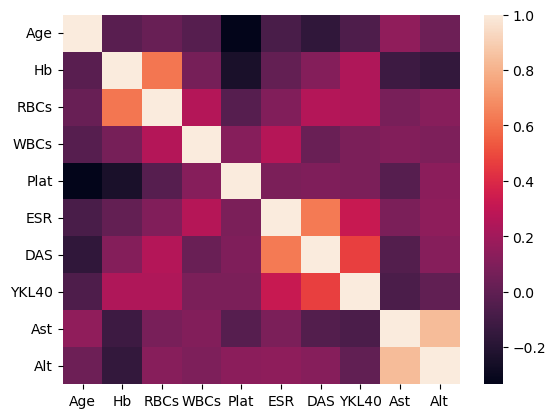

In [11]:
sns.heatmap(raw_data.corr()) 

# Prepare Data

In [52]:
processed_data = raw_data.copy()

In [42]:
if not os.path.exists("preprocess_module/"):
    os.makedirs("preprocess_module/")

In [43]:
%%writefile preprocess_module/preprocessor.py
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import os 
import pickle
def label_encod(data,column_name):
    main_path = os.path.join("Dataset","artifacts")
    if not os.path.exists(main_path):
        os.makedirs(main_path)

    encoder_path = os.path.join("Dataset","artifacts",column_name+".pkl")
    if not os.path.exists(encoder_path): 
        encoder = LabelEncoder()
        transformed_data = encoder.fit_transform(data)
        pickle.dump(encoder,open(encoder_path, 'wb'))
    else: # If it's their, then I just want to you use it to inverse transform // Could be used to transform but no need to make several functions as in this project type we only transform the original data and won't use it again
        encoder = pickle.load(open(encoder_path,'rb')) 
        transformed_data = encoder.inverse_transform(data)
    return transformed_data

def scale_data(data,column_name):
    main_path = os.path.join("Dataset","artifacts")
    if not os.path.exists(main_path):
        os.makedirs(main_path)
        
    scaler_path = os.path.join("Dataset","artifacts",column_name+".pkl")
    if not os.path.exists(scaler_path):
        scaler = MinMaxScaler()
        transformed_data = scaler.fit_transform(data.to_numpy().reshape(-1,1))
        pickle.dump(scaler,open(scaler_path, 'wb'))
    else:
        scaler = pickle.load(open(scaler_path,'rb')) 
        transformed_data = scaler.inverse_transform(data.to_numpy().reshape(-1,1))
    return transformed_data

Overwriting preprocess_module/preprocessor.py


In [44]:
from preprocess_module.preprocessor import scale_data,label_encod

In [3]:
str_col = ["sex","MH","EAM"]
num_col = ["Age","Hb","RBCs","WBCs","Plat","ESR","CRP","DAS","YKL40","RF","Anticcp","Ast","Alt"]

In [46]:
processed_data["Anticcp"].unique() # Some columns has "neg" values which need to be converted numbers, I will make them 0

array(['131', '163', '50', '176', '973', '201', '420', '52', '380', '220',
       '355', '192', '143', '193', '43', '370', '152', '57', '371', '273',
       '54', '393', '42', '48', '154', '395', '475', '186', '28', '32',
       '595', '36', '64', '73', '195', '175', '495', '320', '770', '102',
       '134', '255', '93.37', '35', '87', '31', '142', '125', 'neg',
       '130', '34', '252', '93', '239', '700'], dtype=object)

In [53]:
processed_data["sex"].unique()

array(['F', 'M'], dtype=object)

In [54]:
for col in str_col:
    print(col)
    processed_data[col] = label_encod(processed_data[col],col)

sex
MH
EAM


In [55]:
processed_data[processed_data["CRP"]=="neg"] = 0
processed_data[processed_data["RF"]=="neg"] = 0
processed_data[processed_data["Anticcp"]=="neg"] = 0

In [56]:

for col in num_col:
    print(col)
    processed_data[col] = scale_data(processed_data[col],col)

Age
Hb
RBCs
WBCs
Plat
ESR
CRP
DAS
YKL40
RF
Anticcp
Ast
Alt


In [57]:
#TODO rearrange colmnns
processed_data = processed_data[['Age', 'MH', 'EAM', 'Hb', 'RBCs', 'WBCs', 'Plat', 'ESR', 'CRP', 'DAS',
       'YKL40', 'RF', 'Anticcp', 'Ast', 'Alt', 'sex']]

In [58]:
processed_data.head()

Age  MH  EAM        Hb      RBCs      WBCs      Plat   ESR       CRP  \
0  0.614286   0    0  0.606667  0.701754  0.608108  0.337159  0.55  0.206897   
1  0.557143   0    0  0.726667  0.701754  0.500000  0.539455  0.45  0.965517   
2  0.642857   0    0  0.826667  0.877193  0.256757  0.451937  0.25  0.363448   
3  0.742857   0    0  0.786667  0.910526  0.958108  0.479197  0.80  0.427586   
4  0.714286   0    0  0.873333  0.789474  0.493243  0.361549  0.31  0.401724   

        DAS     YKL40        RF   Anticcp       Ast       Alt  sex  
0  0.854839  0.008401  0.172249  0.134635  0.447368  0.447368    0  
1  0.941935  0.043927  0.598086  0.167523  0.263158  0.263158    0  
2  0.690323  0.401536  0.095694  0.051387  0.447368  0.315789    0  
3  0.851613  0.861738  0.708134  0.180884  0.736842  0.657895    1  
4  1.000000  1.000000  0.361244  1.000000  0.368421  0.342105    1

In [59]:
processed_data.to_csv(os.path.join(main_data_path,"processed_data.csv"),index=False)

# Visualize Data after processing

4


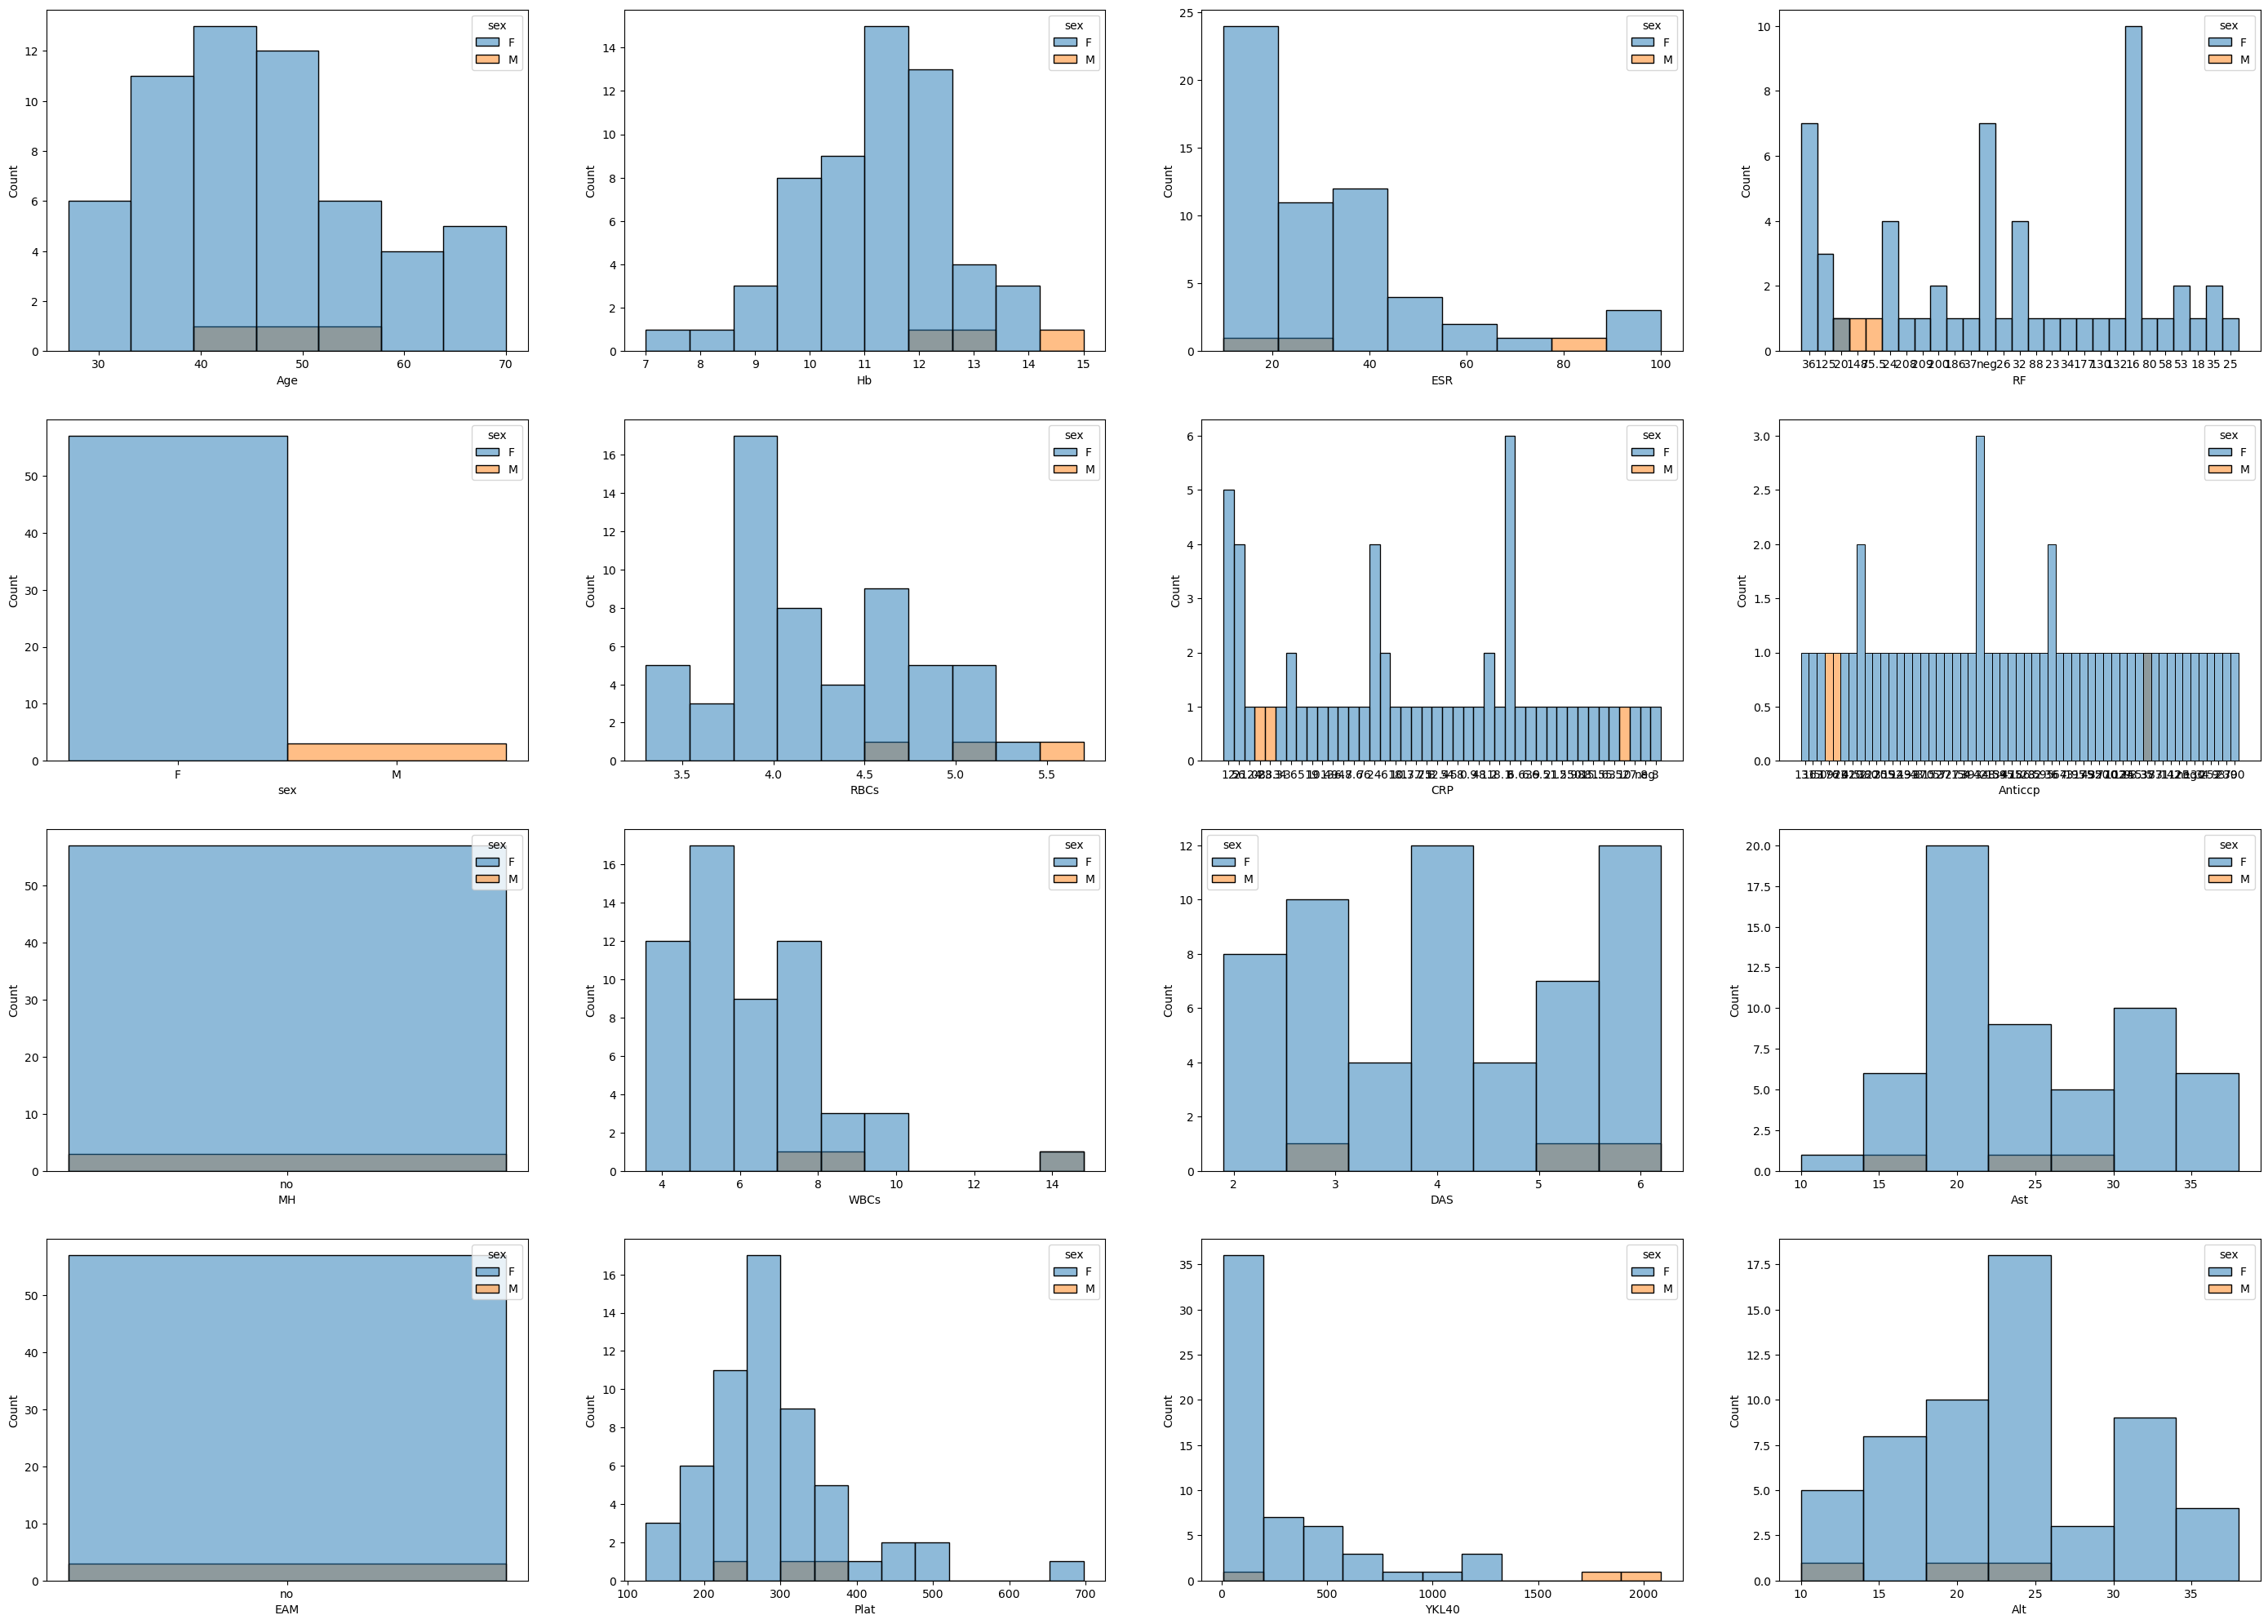

In [60]:
number_of_sub_plots = int((len(raw_data.columns)/2)/2)
print(number_of_sub_plots)
fig, axs = plt.subplots(number_of_sub_plots, number_of_sub_plots, figsize=(35, 25))
xid = 0
yid = 0
for col in raw_data.columns:
    sns.histplot(raw_data,x=col,hue="sex",ax=axs[xid,yid])
    xid+=1
    if xid >= number_of_sub_plots:
        xid=0
        yid+=1
plt.show()

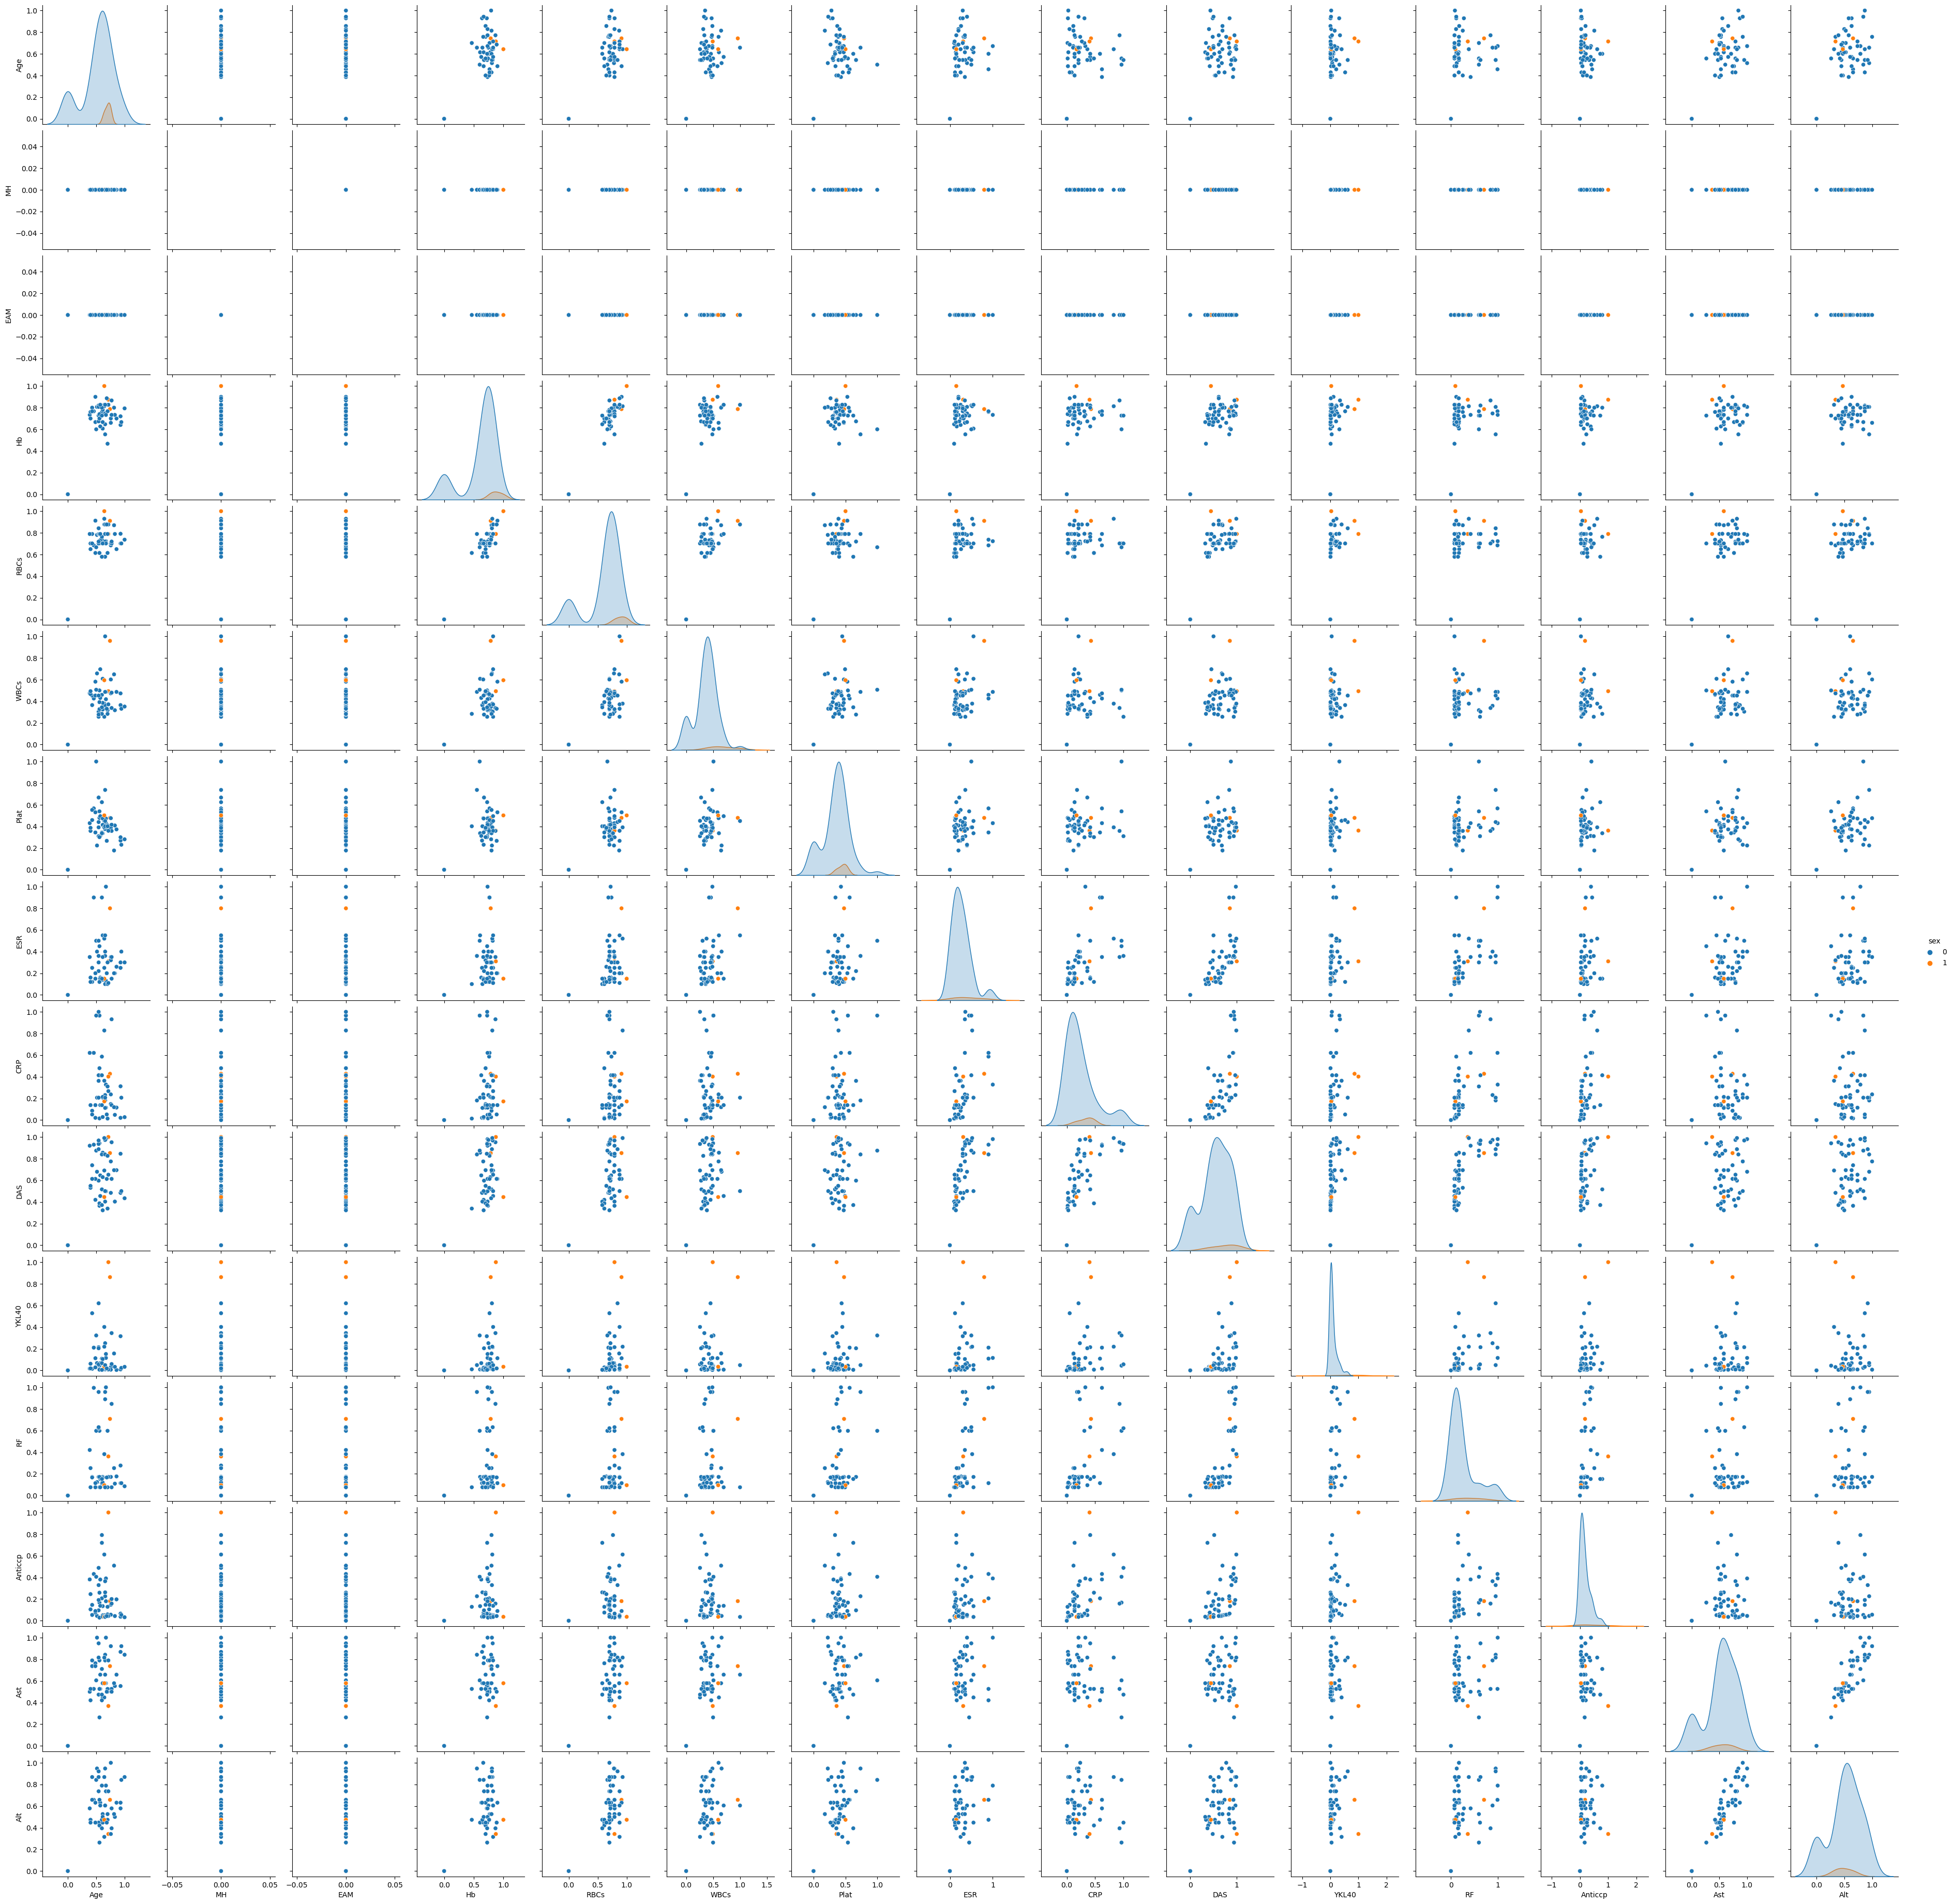

In [61]:
sns.pairplot(processed_data,hue="sex")

<AxesSubplot:>

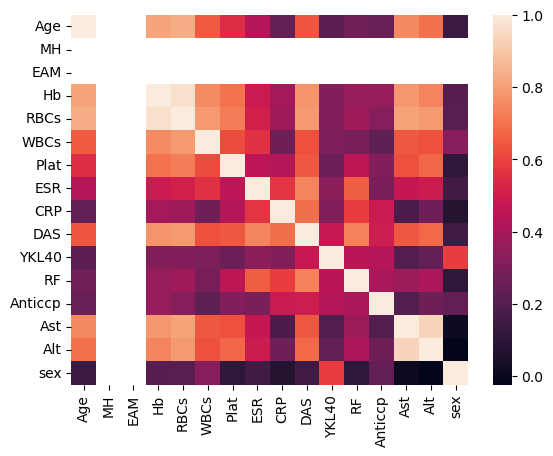

In [62]:
sns.heatmap(processed_data.corr())

## Uploading data to S3 bucket

In [30]:
#TODO get the bucket as well as region
sagemaker_session = sagemaker.Session()
bucket = sagemaker_session.default_bucket()
role = sagemaker.get_execution_role()
session = boto3.session.Session()
region = session.region_name

In [22]:
#TODO Upload the prepared data using boto3

inputs = sagemaker_session.upload_data(path=os.path.join(main_data_path,"processed_data.csv"), bucket=bucket)#, key_prefix="Dataset")
print("inputs for training the model: ",inputs)

inputs for training the model:  s3://sagemaker-us-east-1-187022751034/data/processed_data.csv


We can make the model read csv file from s3 bucket, but it we will have to make our container version as to read it using pandas will cause some errors due to the missing package fsspec, so in case you decided to use custom training container, please pip install fsspec

In [4]:
inputs = 's3://sagemaker-us-east-1-187022751034/data/processed_data.csv'

# Train Model

I will put all modules in one python file only for simplicity.

In [50]:
%%writefile train_diff_generator.py
import torch
from torch.nn import Linear
import torch.nn as nn
import torch.nn.functional as F
import os
import copy
import numpy as np
from torch import optim
import pandas as pd
from torch.utils.data import TensorDataset, DataLoader
import logging
import argparse
import sys
import json
import boto3

logger = logging.getLogger(__name__)
logger.setLevel(logging.DEBUG)
logger.addHandler(logging.StreamHandler(sys.stdout))



class EMA_model:
    def __init__(self, beta):
        super().__init__()
        self.beta = beta
        self.step = 0

    def update_model_average(self, ma_model, current_model):
        for current_params, ma_params in zip(current_model.parameters(), ma_model.parameters()):
            old_weight, up_weight = ma_params.data, current_params.data
            ma_params.data = self.update_average(old_weight, up_weight)

    def update_average(self, old, new):
        if old is None:
            return new
        return old * self.beta + (1 - self.beta) * new

    def step_ema(self, ema_model, model, step_start_ema=2000):
        if self.step < step_start_ema:
            self.reset_parameters(ema_model, model)
            self.step += 1
            return
        self.update_model_average(ema_model, model)
        self.step += 1

    def reset_parameters(self, ema_model, model):
        ema_model.load_state_dict(model.state_dict())


class Generator_conditional(nn.Module):
    def __init__(self, input_features=15, output_features=15, time_dim=1, num_classes=2):
        super().__init__()
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.time_dim = time_dim
        self.inc = Linear(input_features, input_features)
        self.flatten = nn.Flatten()
        self.s1 = Linear(input_features,64)
        self.s2 = Linear(64,120)
        self.s3 = Linear(120,64)
        self.outc = Linear(64, output_features)
        if num_classes is not None:
            self.label_emb = nn.Embedding(num_classes, time_dim)
    
    def pos_encoding(self, t, channels):
        inv_freq = 1.0 / (
            10000
            ** (torch.arange(0, channels, 2, device=self.device).float() / channels)
        )
        pos_enc_a = torch.sin(t.repeat(1, channels // 2) * inv_freq)
        pos_enc_b = torch.cos(t.repeat(1, channels // 2) * inv_freq)
        pos_enc = torch.cat([pos_enc_a, pos_enc_b], dim=-1)
        return pos_enc.type(torch.FloatTensor).to(self.device)
    
    def forward(self, x, t, y):
        t = t.unsqueeze(-1).type(torch.float)
        t = self.pos_encoding(t, self.time_dim)
        
        x1 = self.inc(x)
        x1 = F.relu(x1)
        if y is not None:
            t += self.label_emb(y)
        
        if len(x1.shape) < 2:
            x1 = torch.unsqueeze(x1,1)
        x2 = torch.cat((x1,t),1)
        x2 = torch.squeeze(x2)
        x2 = self.s1(x2)
        x2 = F.relu(x2)
        x2 = self.s2(x2)
        x2 = F.relu(x2)
        x2 = self.s3(x2)
        x2 = F.relu(x2)
        output = self.outc(x2)
        output = F.relu(output)
        return output

# = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = =



def get_data(args):
    data_path = args.data_dir
    logger.info(f"training path: {data_path}")
    data_path = os.path.join(data_path,"processed_data.csv")
    data = pd.read_csv(data_path)#, storage_options=aws_credentials) #Because it's in AWS s3 bucket
    label = torch.from_numpy(data["sex"].to_numpy())
    inputs = torch.from_numpy(data.drop("sex",axis=1).to_numpy())
    dataset = TensorDataset(inputs,label)
    return DataLoader(dataset)

class Diffusion:
    def __init__(self, noise_steps=1000, beta_start=1e-4, beta_end=0.02, num_feature=15):
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

        self.noise_steps = noise_steps
        self.beta_start = beta_start
        self.beta_end = beta_end

        self.beta = self.prepare_noise_schedule().to(self.device)
        self.alpha = 1. - self.beta
        self.alpha_hat = torch.cumprod(self.alpha, dim=0)

        #self.data_shape = num_feature 

    def prepare_noise_schedule(self):
        #return torch.cos(torch.linspace(self.beta_start, self.beta_end, self.noise_steps))
        return torch.linspace(self.beta_start, self.beta_end, self.noise_steps)

    def noise_data(self, x,t):
        sqrt_alpha_hat = torch.sqrt(self.alpha_hat[t])
        sqrt_one_minus_alpha_hat = torch.sqrt(1 - self.alpha_hat[t])
        Ɛ = torch.normal(0.5, 0.24, size=x.shape).to(self.device)#torch.randn_like(x)
        return sqrt_alpha_hat * x + sqrt_one_minus_alpha_hat * Ɛ, Ɛ

    def sample_timesteps(self, n):
        n_shape = n.shape[0] 
        return torch.randint(low=1, high=self.noise_steps, size=(n_shape,))


def train(args):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    dataloader = get_data(args)
    model = Generator_conditional(input_features=args.num_feature, output_features=args.num_feature,num_classes=args.num_classes)
    model = model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=args.lr)
    mse = nn.MSELoss()
    diffusion = Diffusion(num_feature=args.num_feature)
    l = len(dataloader)
    ema = EMA_model(0.995)
    ema_model = copy.deepcopy(model).eval().requires_grad_(False)

    best_mae_score = 100 # Initial arbitrary number
    for epoch in range(args.epochs):
        mae = nn.L1Loss()
        origin_data = []
        predicted_data = []
        for i, (input_data, labels) in enumerate(dataloader):
            input_data = torch.squeeze(input_data).type(torch.float) #The reason for this line is cuda is producing none reasonable error if the shape isn't [15], probably can't use batch_size, (the error isn't produced if we run on cpu)
            origin_data.append(input_data)
            input_data = input_data.to(device)
            labels = labels.to(device)
            t = diffusion.sample_timesteps(input_data).to(device)
            x_t, noise = diffusion.noise_data(input_data, t)
            x_t = x_t.type(torch.float).to(device)
            noise = noise.type(torch.float).to(device)

            if np.random.random() < 0.1:
                labels = None
            predicted_noise = model(x_t, t, labels)
            predicted_data.append(predicted_noise)
            loss = mse(predicted_noise, input_data) #mse(predicted_noise, input_data)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            ema.step_ema(ema_model, model)

        #torch.save(optimizer.state_dict(), os.path.join(main_path, f"optimzer.pt"))
        mae_score = mae(predicted_noise,input_data)
        mse_score = mse(predicted_noise, input_data)
        if mae_score < best_mae_score:
            saving_path = args.model_dir
            #save_model(model, saving_path, "model")
            save_model(ema_model, saving_path, "model")
            print("-----------------saved model-----------------")
            best_mae_score = mae_score
        print(f"Mean Absolute Error: {mae_score}, and MSE score: {mse_score}")
        logger.info(f"Mean Absolute Error: {mae_score}")
        logger.info(f"and MSE score: {mse_score}")
        origin_data = []
        predicted_data = []

def save_model(model,path,model_name):
    torch.save(model.state_dict(), os.path.join(path, f"{model_name}.pth")) #We have to save state_dict to enable the endpoint predictor load the model and pth extension


if __name__=='__main__':
    parser = argparse.ArgumentParser()
    
    parser.add_argument("--epochs",type=int, default=300,help="numbers of epochs for training")
    #args.add_argument("--run_name",type=str, default = "DDPM_conditional", helper="your model will be saved in the name of your run")
    parser.add_argument("--num_feature",type=int, default=15, help="Number of features of your tabular data")
    parser.add_argument("--num_classes",type=int, default=2, help="Number of labels your condition has")
    parser.add_argument("--lr", type=float, default=0.0001, help="learning rate for ML model")

    parser.add_argument("--hosts", type=list, default=json.loads(os.environ["SM_HOSTS"]))
    parser.add_argument("--current-host", type=str, default=os.environ["SM_CURRENT_HOST"])
    parser.add_argument("--model-dir", type=str, default=os.environ["SM_MODEL_DIR"])
    parser.add_argument("--data-dir", type=str, default=os.environ["SM_CHANNEL_TRAINING"])
    parser.add_argument("--num-gpus", type=int, default=os.environ["SM_NUM_GPUS"])

    #parser.add_argument('--train', type=str, default=os.environ['SM_CHANNEL_TRAIN'])
    #parser.add_argument('--test', type=str, default=os.environ['SM_CHANNEL_TEST'])
    args = parser.parse_args()
    
    train(args)


Overwriting train_diff_generator.py


Define the hyperparameter tuning range of your model

In [26]:
from sagemaker.pytorch import PyTorch
from sagemaker import get_execution_role
from sagemaker.tuner import (
    IntegerParameter,
    CategoricalParameter,
    ContinuousParameter,
    HyperparameterTuner,
)

In [27]:
main_instance_type = "ml.m5.xlarge" 

In [7]:
hyperparameter_ranges = {
    "lr": ContinuousParameter(0.00001, 0.9),
    "epochs": IntegerParameter(200, 4000)
}

In [8]:
objective_metric_name = "Mean Absolute Error Score"
objective_type = "Minimize"
metric_definitions = [{"Name": "Mean Absolute Error Score", "Regex": "Mean Absolute Error: ([0-9\\.]+)"}]

In [9]:
#TODO Define your estimator and instance type
estimator = PyTorch(
    entry_point="train_diff_generator.py",
    role=role,
    py_version='py38',
    framework_version="1.11", 
    instance_count=1, 
    instance_type=main_instance_type 
)

In [10]:
tuner = HyperparameterTuner(
    estimator,
    objective_metric_name,
    hyperparameter_ranges,
    metric_definitions,
    max_jobs=20, 
    max_parallel_jobs=10,
    objective_type=objective_type,
)

In [31]:
inputs = "s3://sagemaker-us-east-1-187022751034/data/" #For some weird behavior, training job can't pass the csv file to the container, only folders

In [12]:
tuner.fit(inputs) #We won't use the test channel anyway

No finished training job found associated with this estimator. Please make sure this estimator is only used for building workflow config
No finished training job found associated with this estimator. Please make sure this estimator is only used for building workflow config


.................................................................................................................................................!


In [13]:
sage_client = boto3.Session().client("sagemaker")

tuning_job_name= "pytorch-training-230302-1748"#"pytorch-training-230302-1702"
tuner_result=sagemaker.HyperparameterTuningJobAnalytics(tuning_job_name)
full_df = tuner_result.dataframe()
tuning_job_result = sage_client.describe_hyper_parameter_tuning_job(
    HyperParameterTuningJobName=tuning_job_name
)
objective = tuning_job_result["HyperParameterTuningJobConfig"]["HyperParameterTuningJobObjective"]
is_minimize = objective["Type"] != "Maximize"

if len(full_df) > 0:
    df = full_df[full_df["FinalObjectiveValue"] > -float("inf")]
    if len(df) > 0:
        df = df.sort_values("FinalObjectiveValue", ascending=is_minimize)
        print("Number of training jobs with valid objective: %d" % len(df))
        print({"lowest": min(df["FinalObjectiveValue"]), "highest": max(df["FinalObjectiveValue"])})
        pd.set_option("display.max_colwidth", None)  # Don't truncate TrainingJobName
    else:
        print("No training jobs have reported valid results yet.")

df

Number of training jobs with valid objective: 20
{'lowest': 0.09668345749378204, 'highest': 0.3392254114151001}


epochs        lr                            TrainingJobName  \
1    208.0  0.009014  pytorch-training-230302-1748-019-8e2f27f1   
14  3430.0  0.007647  pytorch-training-230302-1748-006-b811c538   
0    217.0  0.008222  pytorch-training-230302-1748-020-7152fdac   
5   2143.0  0.004409  pytorch-training-230302-1748-015-421e2839   
15  3244.0  0.000730  pytorch-training-230302-1748-005-f0d0790d   
4   4000.0  0.026758  pytorch-training-230302-1748-016-18c81f16   
10   803.0  0.012782  pytorch-training-230302-1748-010-3b1b41a8   
2    200.0  0.005037  pytorch-training-230302-1748-018-cc211807   
3    200.0  0.010335  pytorch-training-230302-1748-017-47ec1169   
13  3539.0  0.000838  pytorch-training-230302-1748-007-80b1ba17   
7   1330.0  0.011632  pytorch-training-230302-1748-013-b21e7ca0   
18  1463.0  0.000157  pytorch-training-230302-1748-002-4e0c9703   
6   1237.0  0.002405  pytorch-training-230302-1748-014-070ff9b1   
17  1541.0  0.000078  pytorch-training-230302-1748-003-bee35d91   
16  2162.0  0.000374  pytorch-training-230302-1748-004-f5111d55   
19  1099.0  0.000021  pytorch-training-230302-1748-001-573713c7   
12  3924.0  0.106905  pytorch-training-230302-1748-008-14151acf   
11   709.0  0.485346  pytorch-training-230302-1748-009-b90bbb60   
8   1217.0  0.112711  pytorch-training-230302-1748-012-496898e0   
9   1962.0  0.712129  pytorch-training-230302-1748-011-57472a82   

   TrainingJobStatus  FinalObjectiveValue         TrainingStartTime  \
1          Completed             0.096683 2023-03-02 17:58:19+00:00   
14         Completed             0.097720 2023-03-02 17:49:34+00:00   
0          Completed             0.100339 2023-03-02 17:58:43+00:00   
5          Completed             0.109504 2023-03-02 17:55:19+00:00   
15         Completed             0.128523 2023-03-02 17:49:29+00:00   
4          Completed             0.135110 2023-03-02 17:57:34+00:00   
10         Completed             0.147864 2023-03-02 17:49:39+00:00   
2          Completed             0.157209 2023-03-02 17:57:48+00:00   
3          Completed             0.162316 2023-03-02 17:57:43+00:00   
13         Completed             0.162455 2023-03-02 17:49:39+00:00   
7          Completed             0.168301 2023-03-02 17:53:58+00:00   
18         Completed             0.169789 2023-03-02 17:50:09+00:00   
6          Completed             0.172187 2023-03-02 17:54:53+00:00   
17         Completed             0.176613 2023-03-02 17:49:28+00:00   
16         Completed             0.181703 2023-03-02 17:49:31+00:00   
19         Completed             0.182738 2023-03-02 17:49:25+00:00   
12         Completed             0.315771 2023-03-02 17:49:38+00:00   
11         Completed             0.339225 2023-03-02 17:49:41+00:00   
8          Completed             0.339225 2023-03-02 17:53:55+00:00   
9          Completed             0.339225 2023-03-02 17:53:22+00:00   

             TrainingEndTime  TrainingElapsedTimeSeconds  
1  2023-03-02 17:59:16+00:00                        57.0  
14 2023-03-02 17:59:28+00:00                       594.0  
0  2023-03-02 17:59:41+00:00                        58.0  
5  2023-03-02 18:02:22+00:00                       423.0  
15 2023-03-02 17:58:58+00:00                       569.0  
4  2023-03-02 18:07:18+00:00                       584.0  
10 2023-03-02 17:53:42+00:00                       243.0  
2  2023-03-02 17:58:41+00:00                        53.0  
3  2023-03-02 17:58:35+00:00                        52.0  
13 2023-03-02 18:00:14+00:00                       635.0  
7  2023-03-02 17:57:25+00:00                       207.0  
18 2023-03-02 17:54:37+00:00                       268.0  
6  2023-03-02 17:58:05+00:00                       192.0  
17 2023-03-02 17:54:41+00:00                       313.0  
16 2023-03-02 17:57:05+00:00                       454.0  
19 2023-03-02 17:53:43+00:00                       258.0  
12 2023-03-02 18:00:48+00:00                       670.0  
11 2023-03-02 17:53:09+00:00              

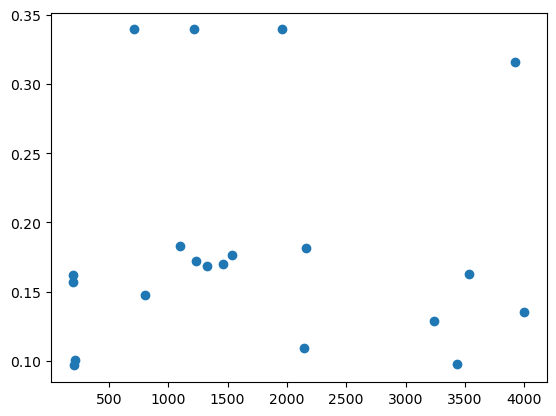

In [18]:
plt.scatter(df["epochs"],df["FinalObjectiveValue"])

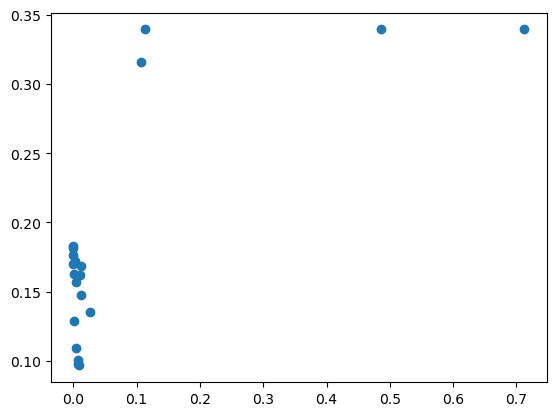

In [19]:
plt.scatter(df["lr"],df["FinalObjectiveValue"])

In [20]:
best_estimator = tuner.best_estimator()#TODO
hyperparameters = best_estimator.hyperparameters()


2023-03-03 07:47:08 Starting - Found matching resource for reuse
2023-03-03 07:47:08 Downloading - Downloading input data
2023-03-03 07:47:08 Training - Training image download completed. Training in progress.
2023-03-03 07:47:08 Uploading - Uploading generated training model
2023-03-03 07:47:08 Completed - Resource reused by training job: pytorch-training-230303-0737-013-d075d00e


In [21]:
hyperparameters

{'_tuning_objective_metric': '"Mean Absolute Error Score"',
 'epochs': '205',
 'lr': '1.0011202687474641e-05',
 'sagemaker_container_log_level': '20',
 'sagemaker_estimator_class_name': '"PyTorch"',
 'sagemaker_estimator_module': '"sagemaker.pytorch.estimator"',
 'sagemaker_job_name': '"pytorch-training-2023-03-03-07-37-35-714"',
 'sagemaker_program': '"train_diff_generator.py"',
 'sagemaker_region': '"us-east-1"',
 'sagemaker_submit_directory': '"s3://sagemaker-us-east-1-187022751034/pytorch-training-2023-03-03-07-37-35-714/source/sourcedir.tar.gz"'}

In [32]:
hyperparameters = {'epochs': 2200, 'lr': 0.0001} #Best model I got was with these parametrs

In [33]:
estimator = PyTorch(
    role=role,
    instance_count=1,
    instance_type=main_instance_type,
    entry_point="train_diff_generator.py",
    py_version='py38',
    framework_version="1.11", 
    hyperparameters=hyperparameters,
)

In [34]:
estimator.fit(inputs)

INFO:sagemaker.image_uris:image_uri is not presented, retrieving image_uri based on instance_type, framework etc.
INFO:sagemaker:Creating training-job with name: pytorch-training-2023-03-03-13-21-10-271


2023-03-03 13:21:11 Starting - Starting the training job...
2023-03-03 13:21:26 Starting - Preparing the instances for training......
2023-03-03 13:22:39 Downloading - Downloading input data
2023-03-03 13:22:39 Training - Downloading the training image.........
2023-03-03 13:23:50 Training - Training image download completed. Training in progress.bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2023-03-03 08:23:55,190 sagemaker-training-toolkit INFO     Imported framework sagemaker_pytorch_container.training
2023-03-03 08:23:55,192 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2023-03-03 08:23:55,194 sagemaker-training-toolkit INFO     No Neurons detected (normal if no neurons installed)
2023-03-03 08:23:55,204 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
2023-03-03 08:23:55,206 sagemaker_pytorch_container.training INFO     Invoking user trainin

In [35]:
print(estimator._current_job_name)
print(estimator.latest_training_job.name)

pytorch-training-2023-03-03-13-21-10-271
pytorch-training-2023-03-03-13-21-10-271


In [36]:
training_job_name = estimator._current_job_name

In [270]:
# In case you deleted the end point, you can redeploy the same mode by uncommenting next lines
from sagemaker.estimator import Estimator
estimator = Estimator.attach(training_job_name,sagemaker_session)#,"ema_model") # The session must be a sagemaker session


2023-03-03 09:28:47 Starting - Preparing the instances for training
2023-03-03 09:28:47 Downloading - Downloading input data
2023-03-03 09:28:47 Training - Training image download completed. Training in progress.
2023-03-03 09:28:47 Uploading - Uploading generated training model
2023-03-03 09:28:47 Completed - Training job completed


In [309]:
#Best_model = 's3://sagemaker-us-east-1-187022751034/pytorch-training-2023-03-03-13-21-10-271/output/model.tar.gz'
#model_location = Best_model

In [37]:
model_location=estimator.model_data 
model_location

's3://sagemaker-us-east-1-187022751034/pytorch-training-2023-03-03-13-21-10-271/output/model.tar.gz'

# Deploying Model To EndPoint

In [38]:
#if not model_location:
    #model_location = 's3://sagemaker-us-east-1-187022751034/pytorch-training-2023-03-02-11-37-08-461/output/model.tar.gz'

In [39]:
%%writefile inference.py
import json
import logging
import sys
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import io
import requests
import numpy as np

from torch.nn import Linear
import copy
from torch import optim

logger = logging.getLogger(__name__)
logger.setLevel(logging.DEBUG)
logger.addHandler(logging.StreamHandler(sys.stdout))



JSON_CONTENT_TYPE = 'application/json'
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class Generator_conditional(nn.Module):
    def __init__(self, input_features=15, output_features=15, time_dim=1, num_classes=2):
        super().__init__()
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.time_dim = time_dim
        self.inc = Linear(input_features, input_features)
        self.flatten = nn.Flatten()
        self.s1 = Linear(input_features,64)
        self.s2 = Linear(64,120)
        self.s3 = Linear(120,64)
        self.outc = Linear(64, output_features)
        if num_classes is not None:
            self.label_emb = nn.Embedding(num_classes, time_dim)
    
    def pos_encoding(self, t, channels):
        inv_freq = 1.0 / (
            10000
            ** (torch.arange(0, channels, 2, device=self.device).float() / channels)
        )
        pos_enc_a = torch.sin(t.repeat(1, channels // 2) * inv_freq)
        pos_enc_b = torch.cos(t.repeat(1, channels // 2) * inv_freq)
        pos_enc = torch.cat([pos_enc_a, pos_enc_b], dim=-1)
        return pos_enc.type(torch.FloatTensor).to(self.device)
    
    def forward(self, x, t, y):
        t = t.unsqueeze(-1).type(torch.float)
        t = self.pos_encoding(t, self.time_dim)
        
        x1 = self.inc(x)
        x1 = F.relu(x1)
        if y is not None:
            t += self.label_emb(y)
        
        if len(x1.shape) < 2:
            x1 = torch.unsqueeze(x1,1)
        x2 = torch.cat((x1,t),1)
        x2 = torch.squeeze(x2)
        x2 = self.s1(x2)
        x2 = F.relu(x2)
        x2 = self.s2(x2)
        x2 = F.relu(x2)
        x2 = self.s3(x2)
        x2 = F.relu(x2)
        output = self.outc(x2)
        output = F.relu(output)
        return output




def model_fn(model_dir):
    print("In model_fn. Model directory is -")
    print(model_dir)
    
    model = Generator_conditional().to(device)
    
    with open(os.path.join(model_dir, "model.pth"), "rb") as f:
        print("Loading the diffusion model")
        checkpoint = torch.load(f,map_location =device)
        model.load_state_dict(checkpoint)

        print('MODEL-LOADED')
        logger.info('model loaded successfully')
    model.eval()
    return model


def input_fn(request_body, content_type=JSON_CONTENT_TYPE):
    logger.info('Deserializing the input data.')
    # process an image uploaded to the endpoint
    logger.debug(f'Request body CONTENT-TYPE is: {content_type}')
    logger.debug(f'Request body TYPE is: {type(request_body)}')
    
    if content_type == JSON_CONTENT_TYPE:
        logger.debug(f'Request body is: {request_body}')
        request = json.loads(request_body)
        logger.debug(f'Loaded JSON object: {request}')
        num_samples = request['num_samples']
        if not isinstance(num_samples,int):
            num_samples = int(num_samples)
        return num_samples
    
    raise Exception('Requested unsupported ContentType in content_type: {}'.format(content_type))
    
    
def produce_fake_data(model,num_of_data: int, label: int = None):
        produced_data = []
        for i in range(num_of_data):
            if not label:
                if np.random.random() < 0.95:
                    label = torch.tensor([0]).to(device)
                else:
                    label = torch.tensor([1]).to(device)
            noise_sample,time_step = produce_noise_sample()
            predicted_data =np.array(model(noise_sample,time_step,label).cpu())

            produced_data.append(np.concatenate((predicted_data,np.array(label.cpu())),axis=0))
        return produced_data
    
def produce_noise_sample(x=[15]):
    "returns a noisy data and a time_step"
    time_step = torch.ones(x).to(device).type(torch.float).to(device)
    # x = torch.tensor(time_step).to(device)
    noise =torch.normal(0.5, 0.24, size=time_step.shape).to(device)
    #noise = torch.randn_like(time_step).to(device)
    return noise,time_step
    
    
def predict_fn(input_object, model):
    logger.info('In predict fn')
    logger.info(f'input_object: {input_object}')
    #noise,time_step = produce_noise_sample()
    with torch.no_grad():
        logger.info('....Will Produce data and prediction now...')
        fake_data = produce_fake_data(model,input_object)
    return fake_data
    
    

Overwriting inference.py


In [40]:
from sagemaker.pytorch import PyTorchModel
from sagemaker.predictor import Predictor

In [41]:
json_serializer = sagemaker.serializers.JSONSerializer()
json_deserializer = sagemaker.deserializers.JSONDeserializer()


class SamplesPredictor(Predictor):
    def __init__(self, endpoint_name, sagemaker_session):
        super(SamplesPredictor, self).__init__(
            endpoint_name,
            sagemaker_session=sagemaker_session,
            serializer=json_serializer,
            deserializer=json_deserializer,
        )

In [42]:
pytorch_model = PyTorchModel(model_data=model_location, role=role, entry_point='inference.py',py_version='py38',
                             framework_version='1.11',
                             predictor_cls=SamplesPredictor)

In [43]:
predictor = pytorch_model.deploy(initial_instance_count=1, instance_type=main_instance_type)

INFO:botocore.credentials:Found credentials from IAM Role: BaseNotebookInstanceEc2InstanceRole
INFO:sagemaker:Creating model with name: pytorch-inference-2023-03-03-13-30-16-570
INFO:sagemaker:Creating endpoint-config with name pytorch-inference-2023-03-03-13-30-17-298
INFO:sagemaker:Creating endpoint with name pytorch-inference-2023-03-03-13-30-17-298


-------!

## Testing Endpoint

In [44]:
request_dict={"num_samples": 60 }


In [68]:
produced_data = predictor.predict(request_dict,initial_args={"ContentType": "application/json"})

In [69]:
produced_data = np.array(produced_data)
produced_data.shape

(60, 16)

In [70]:
produced_data

array([[6.41856670e-01, 0.00000000e+00, 0.00000000e+00, 7.70170510e-01,
        7.69124508e-01, 4.78842765e-01, 4.71229434e-01, 3.33495706e-01,
        2.87691385e-01, 7.09991813e-01, 2.52459317e-01, 3.70093226e-01,
        2.88688749e-01, 6.40551984e-01, 6.50451660e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 7.26011023e-02, 0.00000000e+00, 0.00000000e+00],
       [5.53291380e-01, 0.00000000e+00, 0.00000000e+00, 6.93307161e-01,
        6.83766961e-01, 3.62862736e-01, 4.13162470e-01, 3.31413239e-01,
        4.31061327e-01, 7.03810513e-01, 1.73269942e-01, 3.79035264e-01,
        2.98863173e-01, 5.32307088e-01, 4.98867363e-01, 0.00000000e+00],
       [3.33230555e-01, 0.00000000e+00, 0.00000000e+00, 4.06410217e-01,
        4.12306070e-01, 2.09359005e-01, 2.46851176e-01, 1.973

## Deleting Endpoint

In [71]:
#predictor.delete_endpoint()

# Evaluate Model

In [72]:
produced_data_frame = pd.DataFrame(produced_data,columns=['Age', 'MH', 'EAM', 'Hb', 'RBCs', 'WBCs', 'Plat', 'ESR', 'CRP', 'DAS',
       'YKL40', 'RF', 'Anticcp', 'Ast', 'Alt', 'sex']) 

In [78]:
produced_data_frame.head()

Age   MH  EAM        Hb      RBCs      WBCs      Plat       ESR  \
0  0.188471  0.0  0.0  0.224072  0.238013  0.123385  0.176274  0.070902   
1  0.617456  0.0  0.0  0.743081  0.743950  0.450259  0.428308  0.298327   
2  0.190096  0.0  0.0  0.221420  0.234620  0.133432  0.144669  0.055089   
3  0.615586  0.0  0.0  0.713383  0.725743  0.457358  0.415874  0.330134   
4  0.518833  0.0  0.0  0.607125  0.618722  0.376018  0.346768  0.227881   

        CRP       DAS     YKL40        RF   Anticcp       Ast       Alt  sex  
0  0.076825  0.210085  0.118745  0.133411  0.128176  0.291585  0.166626  0.0  
1  0.367272  0.686997  0.177555  0.324748  0.291072  0.582992  0.567574  0.0  
2  0.081368  0.170935  0.049681  0.037127  0.084982  0.272490  0.131397  0.0  
3  0.208698  0.626305  0.153854  0.282822  0.197527  0.599663  0.610144  0.0  
4  0.170980  0.496792  0.116958  0.181388  0.142540  0.480084  0.471036  0.0

In [79]:
produced_data_frame["sex"][produced_data_frame["sex"] == 1].sum()

4.0

In [80]:
produced_data_frame.to_csv("raw_produced_data.csv",index=False)

In [81]:
produced_data_frame = pd.read_csv("raw_produced_data.csv")

In [82]:
preprocessed_data = pd.read_csv("Dataset/processed_data.csv")

In [83]:
def convert_to_int(data):
    new_data = []
    for x in data:
        new_data.append(int(x))
    return new_data

In [84]:
str_col = ["sex","MH","EAM"]
num_col = ["Age","Hb","RBCs","WBCs","Plat","ESR","CRP","DAS","YKL40","RF","Anticcp","Ast","Alt"]

In [85]:
for col in str_col:
    produced_data_frame[col] = convert_to_int(produced_data_frame[col])

In [86]:
from scipy.stats import ks_2samp,kstest, chisquare

def evaluate_data_distribution(data1,data2,ks_test=True):
    if ks_test:
        results = ks_2samp(data1, data2)
    else:
        results = chisquare(data2)
    return results


In [87]:
kstest_list = []
cstest_list = []
for col_to_eval in str_col:
    res = evaluate_data_distribution(preprocessed_data[col_to_eval],produced_data_frame[col_to_eval],False)
    cstest_list.append(res[0])
    print(f"results for {col_to_eval} are: {res}")

for col_to_eval in num_col:
    res = evaluate_data_distribution(preprocessed_data[col_to_eval],produced_data_frame[col_to_eval],True)
    kstest_list.append(res[0])
    print(f"results for {col_to_eval} are: {res}") 

results for sex are: Power_divergenceResult(statistic=56.00000000000001, pvalue=0.586796909700898)
results for MH are: Power_divergenceResult(statistic=nan, pvalue=nan)
results for EAM are: Power_divergenceResult(statistic=nan, pvalue=nan)
results for Age are: KstestResult(statistic=0.35, pvalue=0.0011710673593103385)
results for Hb are: KstestResult(statistic=0.36666666666666664, pvalue=0.0005569710611454617)
results for RBCs are: KstestResult(statistic=0.35, pvalue=0.0011710673593103385)
results for WBCs are: KstestResult(statistic=0.3, pvalue=0.008703437675484196)
results for Plat are: KstestResult(statistic=0.2833333333333333, pvalue=0.015787628382725075)
results for ESR are: KstestResult(statistic=0.2833333333333333, pvalue=0.015787628382725075)
results for CRP are: KstestResult(statistic=0.15, pvalue=0.51301231282104)
results for DAS are: KstestResult(statistic=0.2833333333333333, pvalue=0.015787628382725075)
results for YKL40 are: KstestResult(statistic=0.31666666666666665, pval

/home/ec2-user/anaconda3/envs/pytorch_p39/lib/python3.9/site-packages/scipy/stats/_stats_py.py:6766: RuntimeWarning: invalid value encountered in divide
  terms = (f_obs_float - f_exp)**2 / f_exp


In [88]:
print(f"ks test result: {1-(sum(kstest_list)/len(kstest_list))} and cs test results: {1-(sum(cstest_list)/len(cstest_list))}")

ks test result: 0.7076923076923077 and cs test results: nan


In [89]:
preprocessed_data.head()

Age  MH  EAM        Hb      RBCs      WBCs      Plat   ESR       CRP  \
0  0.614286   0    0  0.606667  0.701754  0.608108  0.337159  0.55  0.206897   
1  0.557143   0    0  0.726667  0.701754  0.500000  0.539455  0.45  0.965517   
2  0.642857   0    0  0.826667  0.877193  0.256757  0.451937  0.25  0.363448   
3  0.742857   0    0  0.786667  0.910526  0.958108  0.479197  0.80  0.427586   
4  0.714286   0    0  0.873333  0.789474  0.493243  0.361549  0.31  0.401724   

        DAS     YKL40        RF   Anticcp       Ast       Alt  sex  
0  0.854839  0.008401  0.172249  0.134635  0.447368  0.447368    0  
1  0.941935  0.043927  0.598086  0.167523  0.263158  0.263158    0  
2  0.690323  0.401536  0.095694  0.051387  0.447368  0.315789    0  
3  0.851613  0.861738  0.708134  0.180884  0.736842  0.657895    1  
4  1.000000  1.000000  0.361244  1.000000  0.368421  0.342105    1

In [90]:
produced_data_frame.head()

Age  MH  EAM        Hb      RBCs      WBCs      Plat       ESR  \
0  0.188471   0    0  0.224072  0.238013  0.123385  0.176274  0.070902   
1  0.617456   0    0  0.743081  0.743950  0.450259  0.428308  0.298327   
2  0.190096   0    0  0.221420  0.234620  0.133432  0.144669  0.055089   
3  0.615586   0    0  0.713383  0.725743  0.457358  0.415874  0.330134   
4  0.518833   0    0  0.607125  0.618722  0.376018  0.346768  0.227881   

        CRP       DAS     YKL40        RF   Anticcp       Ast       Alt  sex  
0  0.076825  0.210085  0.118745  0.133411  0.128176  0.291585  0.166626    0  
1  0.367272  0.686997  0.177555  0.324748  0.291072  0.582992  0.567574    0  
2  0.081368  0.170935  0.049681  0.037127  0.084982  0.272490  0.131397    0  
3  0.208698  0.626305  0.153854  0.282822  0.197527  0.599663  0.610144    0  
4  0.170980  0.496792  0.116958  0.181388  0.142540  0.480084  0.471036    0

4


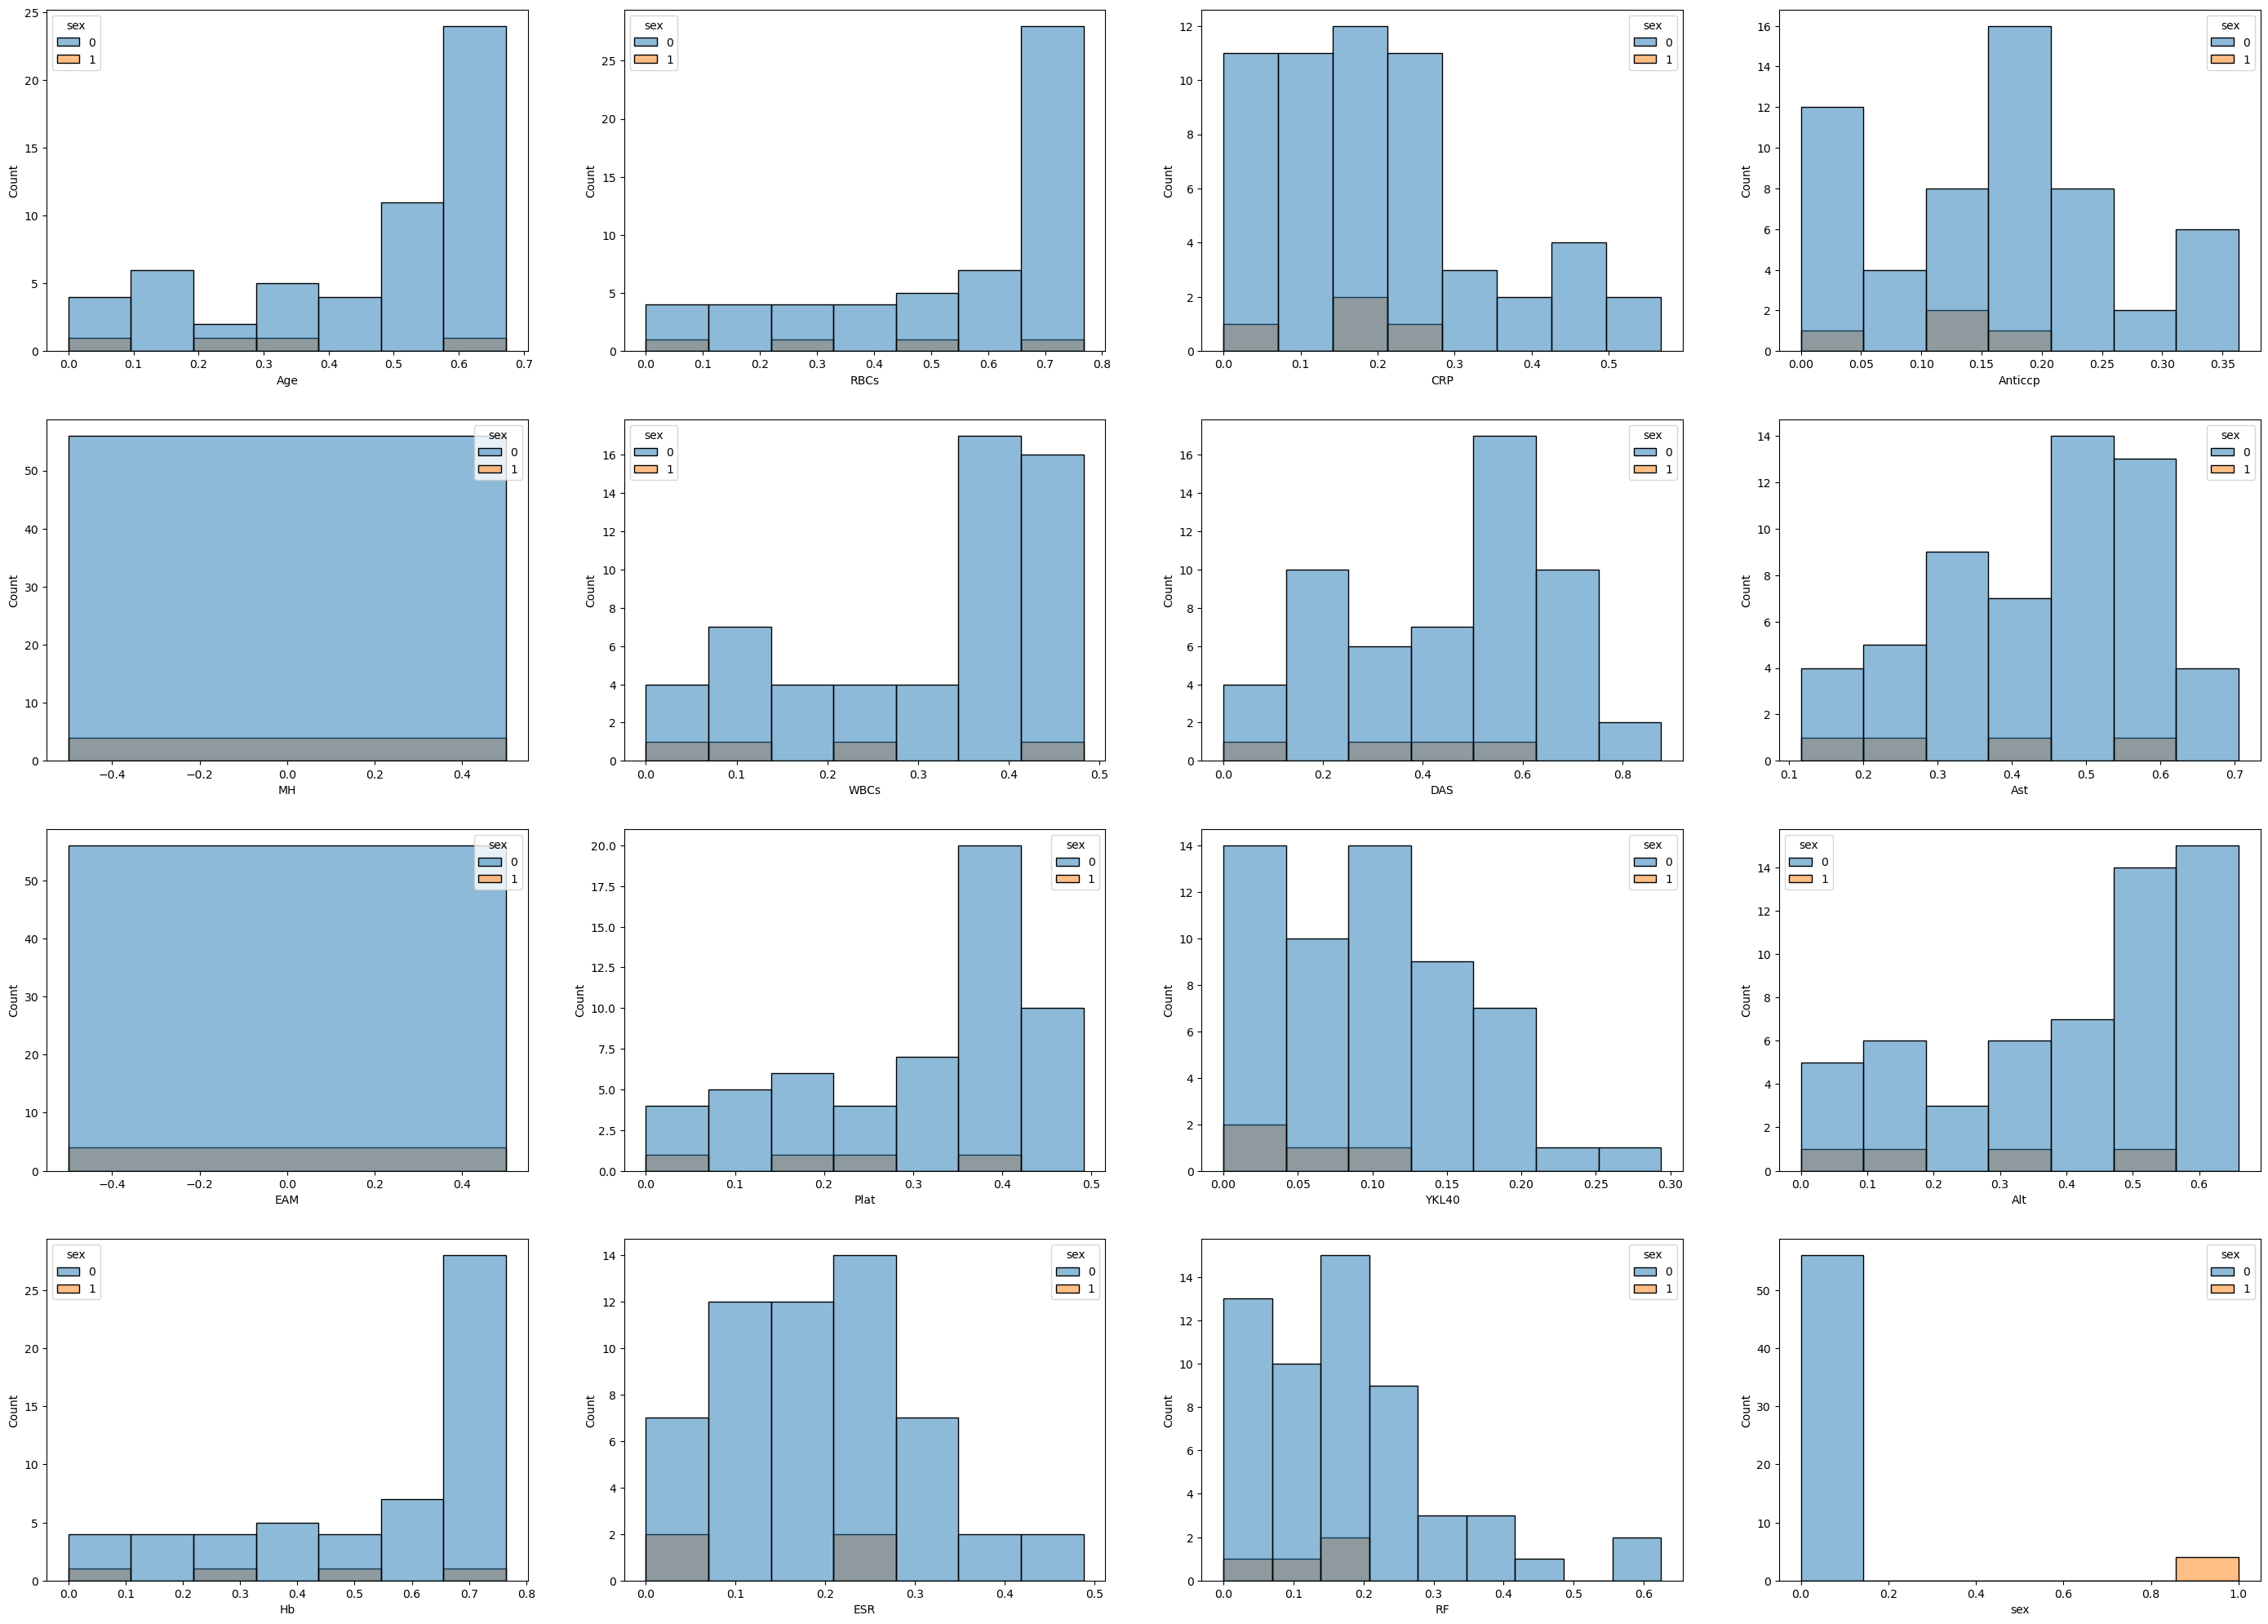

In [91]:
number_of_sub_plots = int((len(produced_data_frame.columns)/2)/2)
print(number_of_sub_plots)
fig, axs = plt.subplots(number_of_sub_plots, number_of_sub_plots, figsize=(35, 25))
xid = 0
yid = 0
for col in produced_data_frame.columns:
    sns.histplot(produced_data_frame,x=col,hue="sex",ax=axs[xid,yid])
    xid+=1
    if xid >= number_of_sub_plots:
        xid=0
        yid+=1
plt.show()

In [92]:
from preprocess_module.preprocessor import scale_data,label_encod

def inverse_data(dataframe):
    str_col = ["sex","MH","EAM"]
    num_col = ["Age","Hb","RBCs","WBCs","Plat","ESR","CRP","DAS","YKL40","RF","Anticcp","Ast","Alt"]
    new_data_frame = pd.DataFrame([])
    for col in str_col:
        new_data_frame[col] = label_encod(dataframe[col],col)

    for col in num_col:
        new_data_frame[col] = scale_data(dataframe[col],col)
    return new_data_frame

In [93]:
transformed_produced_data = inverse_data(produced_data_frame)

In [94]:
transformed_produced_data.head()

sex  MH EAM        Age         Hb      RBCs      WBCs        Plat  \
0   F  no  no  13.192969   3.361078  1.356672  1.826092  122.862688   
1   F  no  no  43.221938  11.146214  4.240516  6.663836  298.530891   
2   F  no  no  13.306738   3.321302  1.337332  1.974798  100.834093   
3   F  no  no  43.091052  10.700750  4.136732  6.768901  289.864347   
4   F  no  no  36.318292   9.106878  3.526716  5.565067  241.697436   

         ESR        CRP       DAS       YKL40         RF     Anticcp  \
0   7.090215   4.455827  1.302528  247.346252  27.882987  124.715455   
1  29.832742  21.301753  4.259383  369.847458  67.872434  283.213183   
2   5.508906   4.719371  1.059800  103.485276   7.759466   82.687907   
3  33.013365  12.104481  3.883093  320.478870  59.109826  192.193879   
4  22.788079   9.916840  3.080109  243.624289  37.910190  138.691167   

         Ast        Alt  
0  11.080242   6.331787  
1  22.153715  21.567813  
2  10.354612   4.993082  
3  22.787208  23.185461  
4  18.243185  17.899372

4


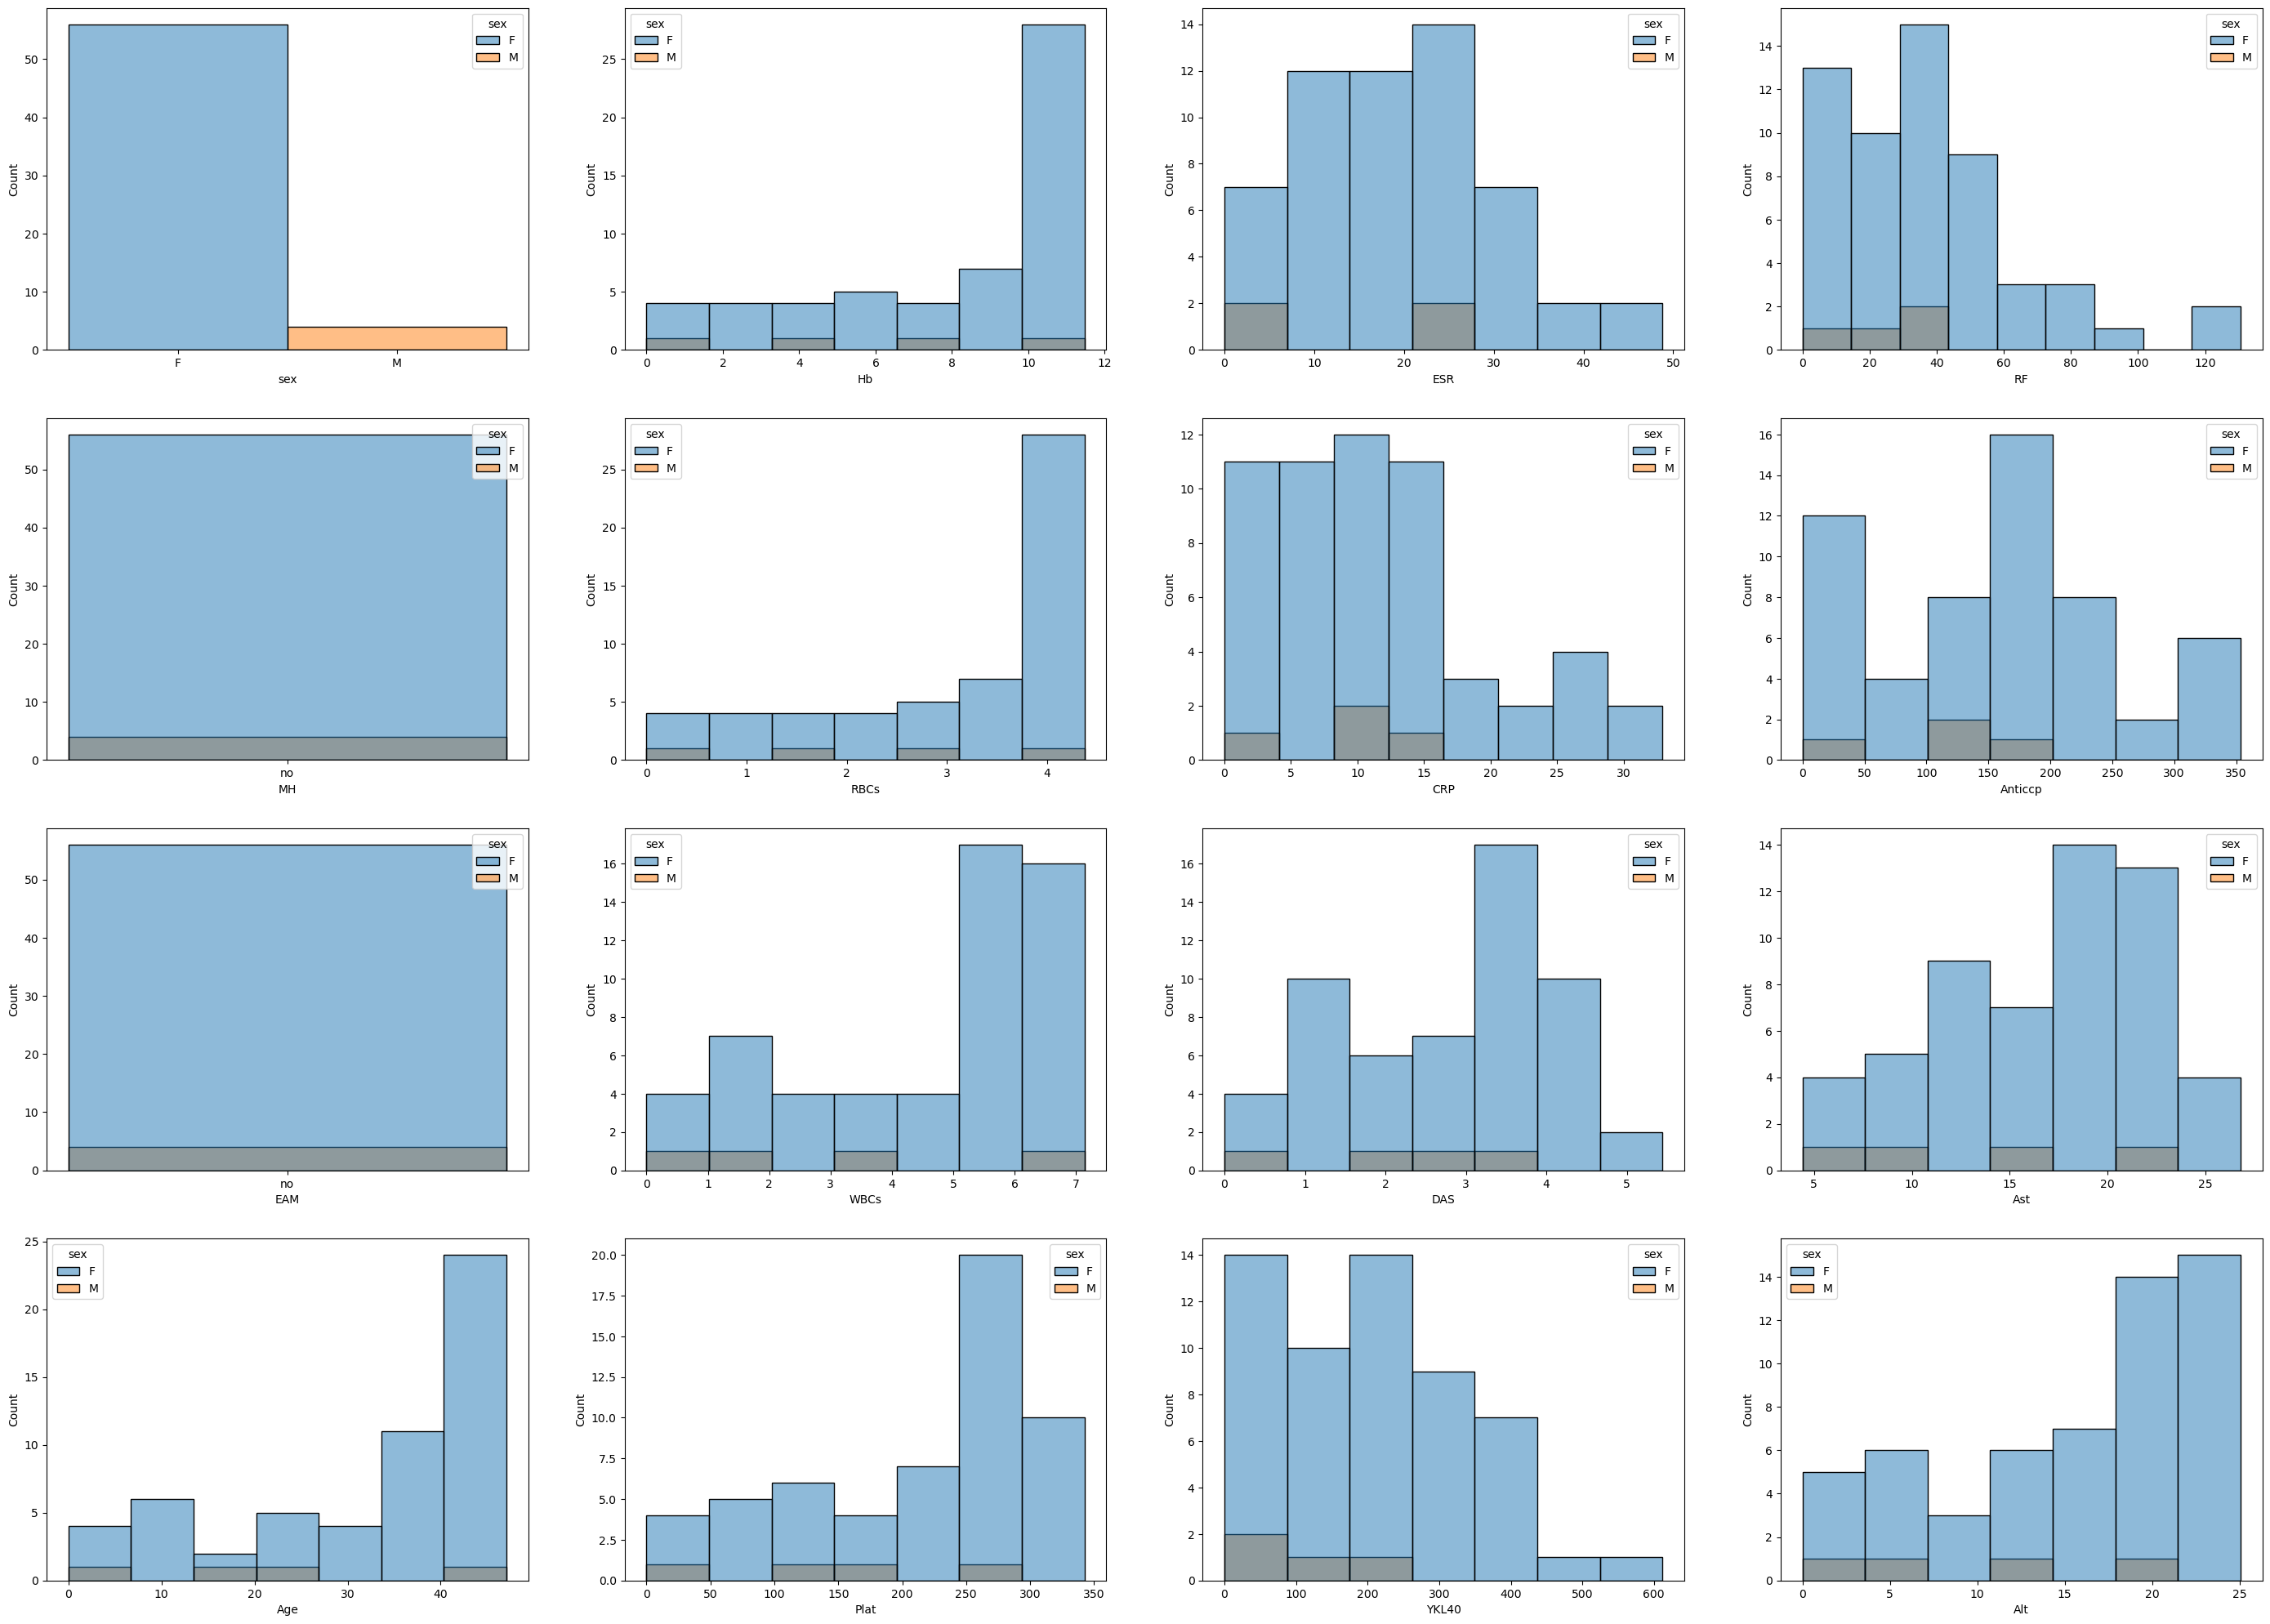

In [95]:
number_of_sub_plots = int((len(transformed_produced_data.columns)/2)/2)
print(number_of_sub_plots)
fig, axs = plt.subplots(number_of_sub_plots, number_of_sub_plots, figsize=(35, 25))
xid = 0
yid = 0
for col in transformed_produced_data.columns:
    sns.histplot(transformed_produced_data,x=col,hue="sex",ax=axs[xid,yid])
    xid+=1
    if xid >= number_of_sub_plots:
        xid=0
        yid+=1
plt.show()

In [96]:
preprocessed_data.describe()

Age    MH   EAM         Hb       RBCs       WBCs       Plat  \
count  60.000000  60.0  60.0  60.000000  60.000000  60.000000  60.000000   
mean    0.543810   0.0   0.0   0.633111   0.637573   0.381318   0.358274   
std     0.266443   0.0   0.0   0.281508   0.283371   0.214138   0.197255   
min     0.000000   0.0   0.0   0.000000   0.000000   0.000000   0.000000   
25%     0.478571   0.0   0.0   0.645000   0.649123   0.314189   0.295194   
50%     0.600000   0.0   0.0   0.733333   0.701754   0.381757   0.387374   
75%     0.700000   0.0   0.0   0.800000   0.789474   0.486486   0.462697   
max     1.000000   0.0   0.0   1.000000   1.000000   1.000000   1.000000   

             ESR        CRP        DAS      YKL40         RF    Anticcp  \
count  60.000000  60.000000  60.000000  60.000000  60.000000  60.000000   
mean    0.268833   0.247991   0.567554   0.118581   0.257855   0.185053   
std     0.227932   0.266886   0.308718   0.202638   0.288982   0.213346   
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.120000   0.043233   0.403226   0.007825   0.076555   0.041624   
50%     0.210000   0.160345   0.612903   0.032741   0.153110   0.116650   
75%     0.352500   0.362414   0.840323   0.124220   0.298445   0.248972   
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   

             Ast        Alt        sex  
count  60.000000  60.000000  60.000000  
mean    0.546491   0.518860   0.050000  
std     0.281867   0.278546   0.219784  
min     0.000000   0.000000   0.000000  
25%     0.467105   0.414474   0.000000  
50%     0.565789   0.526316   0.000000  
75%     0.769737   0.677632   0.000000  
max     1.000000   1.000000   1.000000

In [97]:
produced_data_frame.describe()

Age    MH   EAM         Hb       RBCs       WBCs       Plat  \
count  60.000000  60.0  60.0  60.000000  60.000000  60.000000  60.000000   
mean    0.445886   0.0   0.0   0.523423   0.527941   0.304401   0.299130   
std     0.209909   0.0   0.0   0.248690   0.244874   0.150238   0.139482   
min     0.000000   0.0   0.0   0.000000   0.000000   0.000000   0.000000   
25%     0.319049   0.0   0.0   0.339448   0.358670   0.200960   0.187756   
50%     0.540617   0.0   0.0   0.645201   0.654742   0.368444   0.357389   
75%     0.615914   0.0   0.0   0.728287   0.726610   0.428674   0.412231   
max     0.672366   0.0   0.0   0.764384   0.767102   0.482050   0.491308   

             ESR        CRP        DAS      YKL40         RF    Anticcp  \
count  60.000000  60.000000  60.000000  60.000000  60.000000  60.000000   
mean    0.188566   0.190861   0.443756   0.094653   0.171947   0.158532   
std     0.113599   0.140353   0.225626   0.067045   0.131346   0.099666   
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.094391   0.092933   0.253835   0.039080   0.078876   0.078250   
50%     0.196593   0.174441   0.507103   0.097534   0.148935   0.168131   
75%     0.250110   0.250890   0.593641   0.137549   0.229056   0.216028   
max     0.487904   0.567521   0.877624   0.293735   0.624499   0.363206   

             Ast        Alt        sex  
count  60.000000  60.000000  60.000000  
mean    0.436826   0.398367   0.066667  
std     0.141749   0.199876   0.251549  
min     0.116085   0.000000   0.000000  
25%     0.325690   0.274167   0.000000  
50%     0.461342   0.469826   0.000000  
75%     0.553155   0.564219   0.000000  
max     0.705016   0.659228   1.000000

In [140]:
def compare_dist_two_sets(origin_data,synthetic_data):
    number_of_sub_plots = int((len(origin_data.columns)/2)/2)
    fig, axs = plt.subplots(number_of_sub_plots, number_of_sub_plots, figsize=(65, 45))
    xid = 0
    yid = 0
    for col in origin_data.columns:
        fig.canvas.set_window_title(col)
        show_data = pd.DataFrame([]) # Initiate empty data frame
        col_data_list = []
        data_type_list = []
        
        col_data_list = origin_data[col].tolist() #get the original data first
        data_type_list = ["Origin" for _ in range(len(col_data_list))] #generat rows indcate that these are  origin       
        
        for value in synthetic_data[col]:
            col_data_list.append(value)
            
        
        for _ in range(len(synthetic_data[col])):   
            data_type_list.append("Generated") # Indciate that these new rows are synth

    
        show_data[col] = col_data_list
        show_data["data_type"] = data_type_list
    
        sns.histplot(show_data,x=col,hue="data_type",ax=axs[xid,yid])
        xid+=1
        if xid >= number_of_sub_plots:
            xid=0
            yid+=1
        
    plt.show()

/tmp/ipykernel_9131/479014429.py:7: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use `.FigureManagerBase.set_window_title` or GUI-specific methods instead.
  fig.canvas.set_window_title(col)
/tmp/ipykernel_9131/479014429.py:7: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use `.FigureManagerBase.set_window_title` or GUI-specific methods instead.
  fig.canvas.set_window_title(col)
/tmp/ipykernel_9131/479014429.py:7: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use `.FigureManagerBase.set_window_title` or GUI-specific methods instead.
  fig.canvas.set_window_title(col)
/tmp/ipykernel_9131/479014429.py:7: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be 

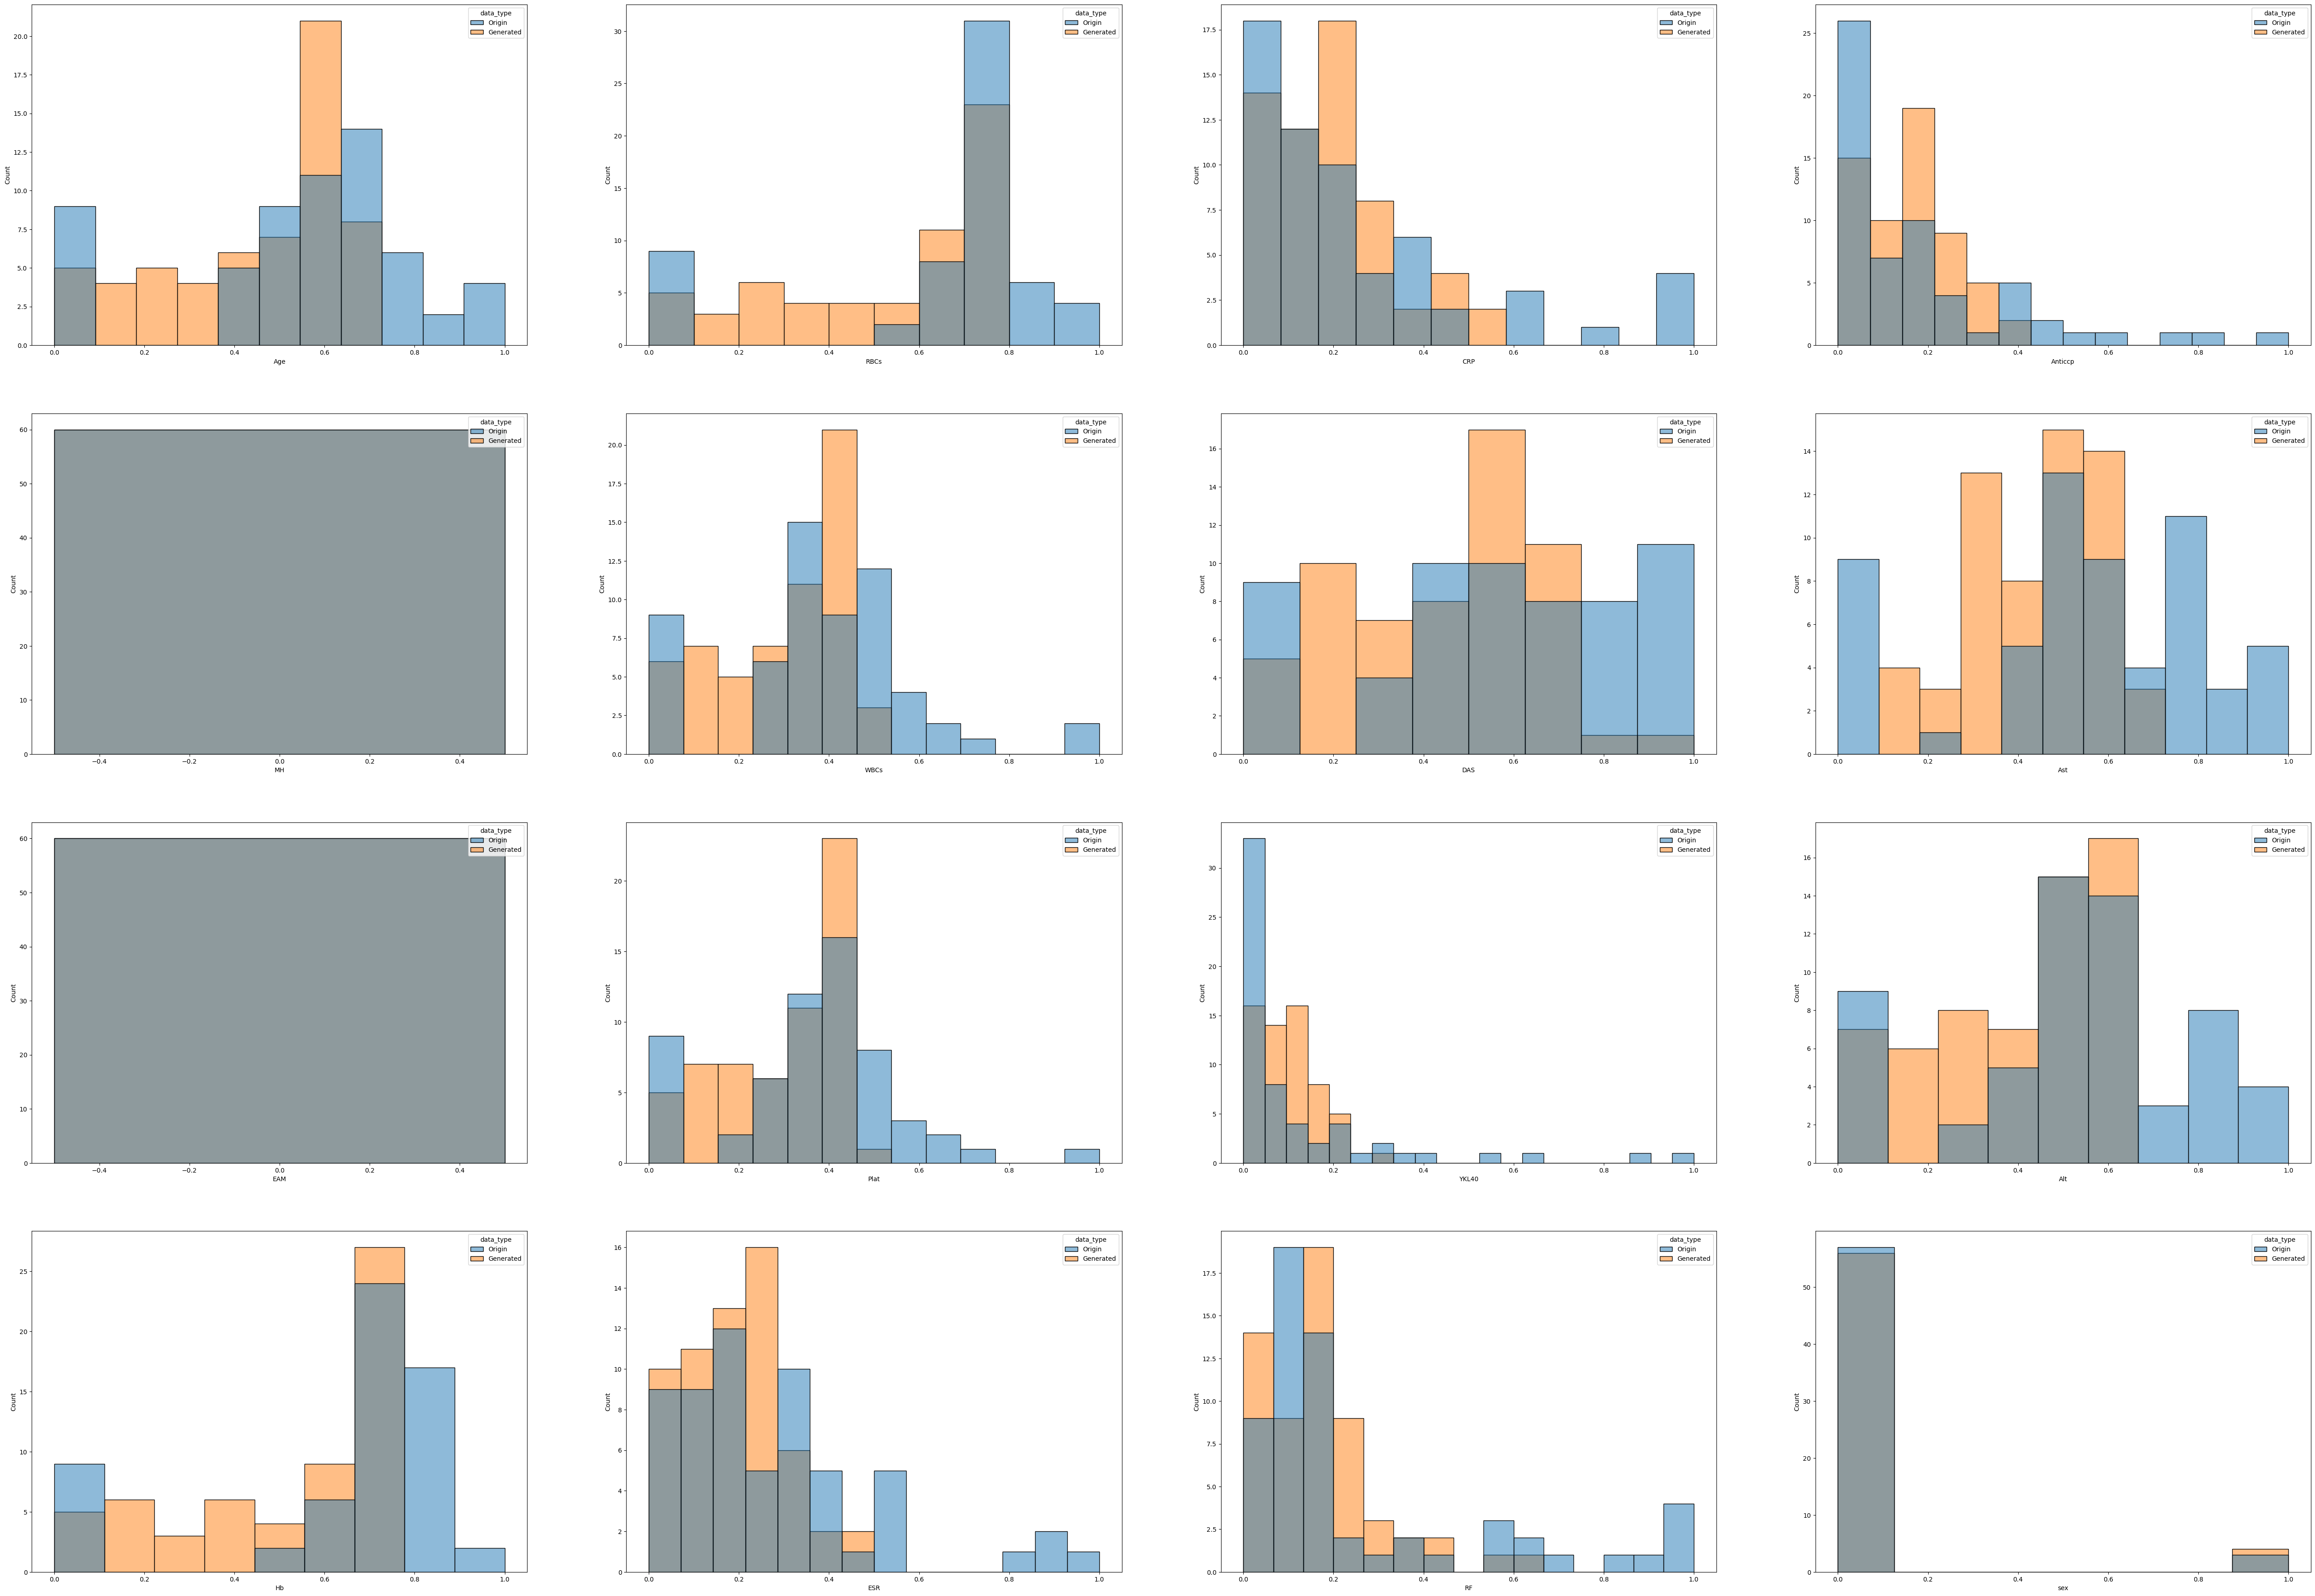

In [141]:
compare_dist_two_sets(preprocessed_data,produced_data_frame)

In [143]:
"_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-FINISHED_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-"

'_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-FINISHED_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-'